In [89]:
# libraries
import pandas as pd
import missingno as msno
import numpy as np
import janitor as jn
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from pandas.api.types import CategoricalDtype

sns.set(rc={"figure.dpi": 150, "savefig.dpi": 300})
sns.set_context("notebook")
sns.set()

<center><img src="../img/detective.jpg"></center>


<center><span style="font-size:150%; font-style:italic">In this Exploratory Data Analysis we'll be investigating our curated dataset. We'll be performing a uni and bivariate analysis searching for possibles hypothesis to test.</span></center>

# Summary

1. [Univariate Analysis](#univariat-analysis)
   1. [Transforming Variable Types](#transforming-variable-types)
   2. [Categorical Varibles](#categorical-variables)
   3. [Numeric Variables](#numerical-variables)
2. [Looking at missing values](#looking-at-missing-values)
   1. [Imputing missing values](#imputing-missing-values)
3. [Bivariate Analysis](#bivariete-analysis)


In [2]:
# dataset
infer_phq_hei_curated_raw_df = pd.read_csv("../data/curated/demo_phq_pag_hei_cureted.csv")

In [3]:
# copying the df to keep one df as reference
infer_phq_hei_curated_df = infer_phq_hei_curated_raw_df.copy()

As we calculated the value of the phq_9_score, based on the dpq_ variables answers, we can drop those columns in our analysis in this first moment of the analysis.

In [4]:
infer_phq_hei_curated_df.drop(infer_phq_hei_curated_df.columns[1:10], axis=1, inplace=True)

In [91]:
# saving this dataset on curated zone
infer_phq_hei_curated_df.to_csv("../data/curated/demo_phq_pag_hei_cureted_v2.csv", index=False)

In [5]:
infer_phq_hei_curated_df.head()

,seqn,riagendr,ridageyr,ridreth1,dmdeduc,indfminc,pag_minw,adherence,hei2015c1_totalveg,hei2015c2_green_and_bean,...,hei2015c7_totprot,hei2015c8_seaplant_prot,hei2015c9_fattyacid,hei2015c10_sodium,hei2015c11_refinedgrain,hei2015c12_sfat,hei2015c13_addsug,hei2015_total_score,phq_9_score,phq_9_score_str
0,31130,2,85,3,4,4.0,0.000000,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,31131,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Minimal depression
2,31132,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Minimal depression
3,31134,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Minimal depression
4,31139,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,...,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Minimal depression


Which leave us with 24 variables, between categorical and numeric. One thing that I like to do is check how pandas is interpreting my data types, and change those based on what I found. 

## Univariate Analysis  <a class="anchor" id="univariat-analysis"></a>

In the `pre-processing.ipynb`, we saw the characteristic of each of those variables, here I'll be putting the types I believe that make sense.

- riagendr: categorical
- ridageyr: numerical
- ridreth1: categorical
- dmdeduc: cardinal (categorical)
- indfminc: cardinal (categorical)
- pg_minw: float
- adherence: cardinal (categorical)
- hei2015_: float

This will facilitate when we goes to build some visualizations.

### Transforming variables type <a class="anchor" id="transforming-variable-types"></a>

In [6]:
# actual types
infer_phq_hei_curated_df.dtypes

seqn                          int64
riagendr                      int64
ridageyr                      int64
ridreth1                      int64
dmdeduc                       int64
indfminc                    float64
pag_minw                    float64
adherence                   float64
hei2015c1_totalveg          float64
hei2015c2_green_and_bean    float64
hei2015c3_totalfruit        float64
hei2015c4_wholefruit        float64
hei2015c5_wholegrain        float64
hei2015c6_totaldairy        float64
hei2015c7_totprot           float64
hei2015c8_seaplant_prot     float64
hei2015c9_fattyacid         float64
hei2015c10_sodium           float64
hei2015c11_refinedgrain     float64
hei2015c12_sfat             float64
hei2015c13_addsug           float64
hei2015_total_score         float64
phq_9_score                 float64
phq_9_score_str              object
dtype: object

Tha `pandas` library have a great way to transform categorical variables, where we can specify the categorical classes present on our data.

In [7]:
gender_type = CategoricalDtype(categories=[1, 2], ordered=False)
race_type = CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False)
educ_type = CategoricalDtype(categories=[1, 2, 3, 4, 5, 7, 9], ordered=True)
revenue_type = CategoricalDtype(
    categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 77, 99], ordered=True
)
adherence_type = CategoricalDtype(categories=[1, 2, 3], ordered=True)
phq_9_score_str_type = CategoricalDtype(
    categories=[
        "Minimal depression",
        "Mild depression",
        "Moderate depression",
        "Moderately severe depression",
        "Severe depression",
    ],
    ordered=True,
)

We can also rename more easily categorical variables using pandas function `rename_categories`, see the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.rename_categories.html).

In [8]:
# now we just pass the categorical class that was created before
infer_phq_hei_curated_df["riagendr"] = infer_phq_hei_curated_df["riagendr"].astype(
    gender_type
)
infer_phq_hei_curated_df["ridreth1"] = infer_phq_hei_curated_df["ridreth1"].astype(
    race_type
)
infer_phq_hei_curated_df["dmdeduc"] = infer_phq_hei_curated_df["dmdeduc"].astype(
    educ_type
)
infer_phq_hei_curated_df["indfminc"] = infer_phq_hei_curated_df["indfminc"].astype(
    revenue_type
)
infer_phq_hei_curated_df["adherence"] = infer_phq_hei_curated_df["adherence"].astype(
    adherence_type
)
infer_phq_hei_curated_df["phq_9_score_str"] = infer_phq_hei_curated_df["phq_9_score_str"].astype(
    phq_9_score_str_type
)

And those are the type after the conversion. Much better!🚀

In [9]:
infer_phq_hei_curated_df.dtypes

seqn                           int64
riagendr                    category
ridageyr                       int64
ridreth1                    category
dmdeduc                     category
indfminc                    category
pag_minw                     float64
adherence                   category
hei2015c1_totalveg           float64
hei2015c2_green_and_bean     float64
hei2015c3_totalfruit         float64
hei2015c4_wholefruit         float64
hei2015c5_wholegrain         float64
hei2015c6_totaldairy         float64
hei2015c7_totprot            float64
hei2015c8_seaplant_prot      float64
hei2015c9_fattyacid          float64
hei2015c10_sodium            float64
hei2015c11_refinedgrain      float64
hei2015c12_sfat              float64
hei2015c13_addsug            float64
hei2015_total_score          float64
phq_9_score                  float64
phq_9_score_str             category
dtype: object

### Categorical Variables

Now that we have all types correctly named, let's analyze the categorical variables and see how our data are distributed. For that we'll be using a very handy function from Pandas, `.select_dtypes`, where we can specify the type of data we want, and retrieve the name of the columns with this specific type.

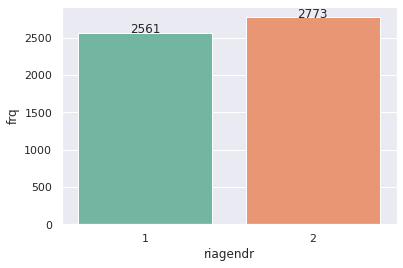

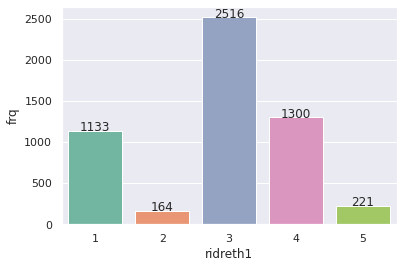

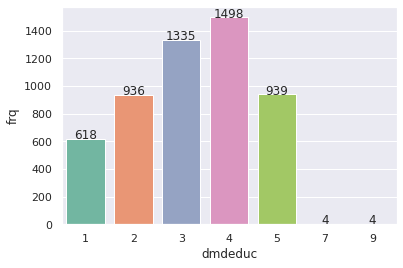

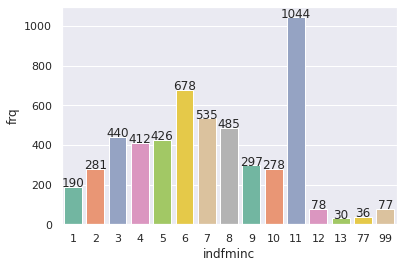

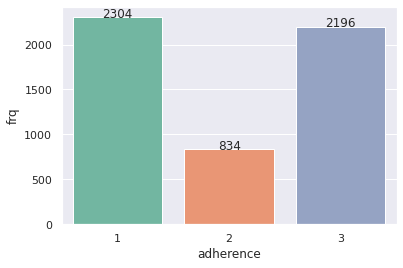

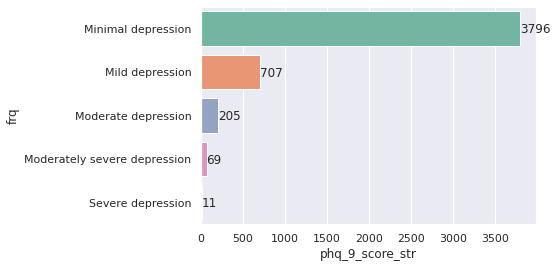

In [10]:
categorical_variables = infer_phq_hei_curated_df.select_dtypes("category").columns

for category in categorical_variables:
    # rotate the orientation for this specific variable
    if category == "phq_9_score_str":
        ax = sns.countplot(
            y=category,
            data=infer_phq_hei_curated_df,
            palette="Set2",
        )
        _ = plt.xlabel(category)
        _ = plt.ylabel("frq")

        # to put the values on the axes
        for p in ax.patches:
            ax.annotate(
                "{}".format(p.get_width()), (p.get_width(), p.get_y() + 0.5), ha="left"
            )
    else:
        ax = sns.countplot(
            x=category,
            data=infer_phq_hei_curated_df,
            palette="Set2",
        )
        _ = plt.xlabel(category)
        _ = plt.ylabel("frq")

        # to put the values on the axes
        for p in ax.patches:
            ax.annotate(
                "{}".format(p.get_height()),
                (p.get_x() + 0.4, p.get_height()),
                ha="center",
            )

    plt.show()

Observations:

- We have a very similar distribution of males and females.
- We have a very few observations related to black non-hispanic, and a high obs of mexican-american. We also have some observations with other category, that may contain different races.
- Besides we have low grades of scholar years, those are not childrens, the minimal age on this dataset is 18 years old.
- Related to annual familiar revenue, we saw that most of the observations goes below that 75k US$, with some more than 75K.
- We also sow some extremes on adherence, with lots of low adherence and lots of up adherence.
- Is clear too that we have very few data about severe depression, and a lot of minimal depression.

### Numerical Variables

Let's analyze the numerical variables and see how our data are distributed. For that, we'll plot the histogram of those features.

In [11]:
numerical_variables = infer_phq_hei_curated_df.select_dtypes(["int64", "float64"]).columns

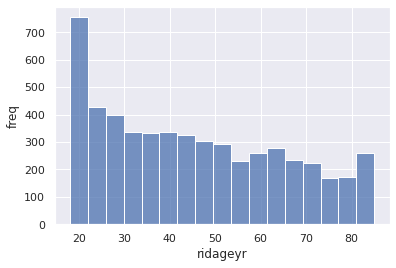

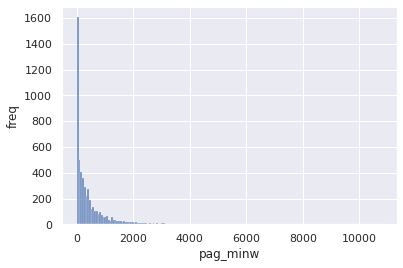

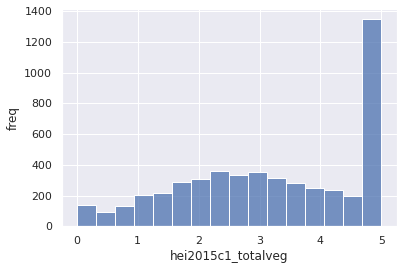

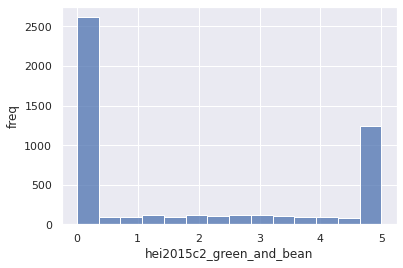

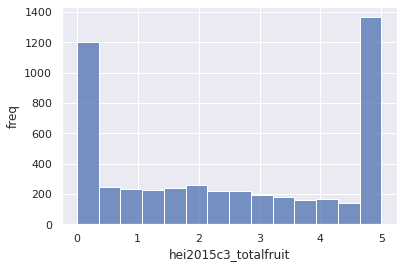

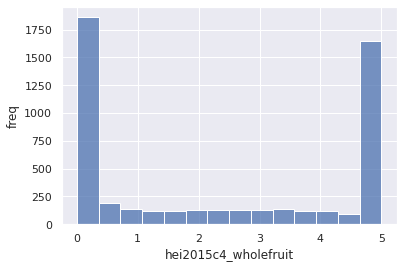

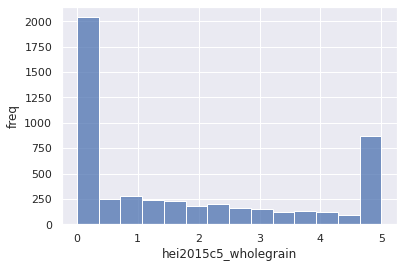

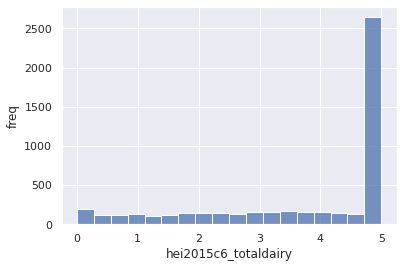

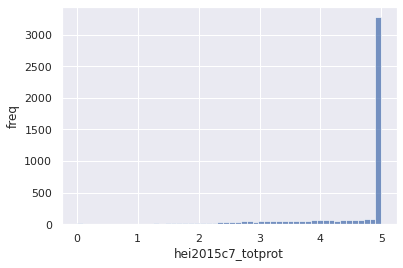

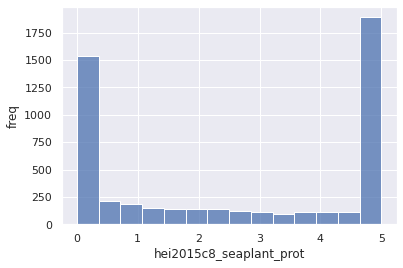

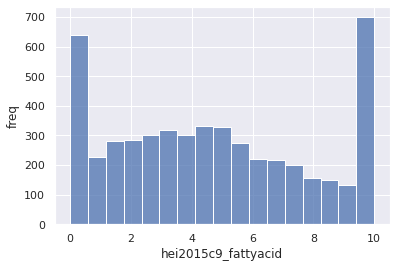

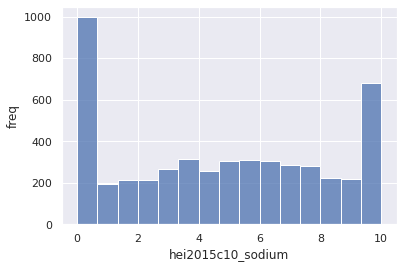

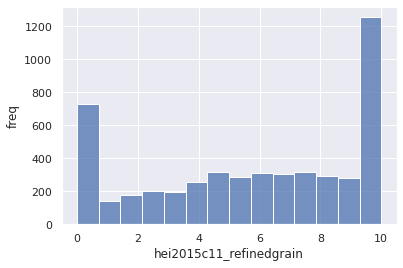

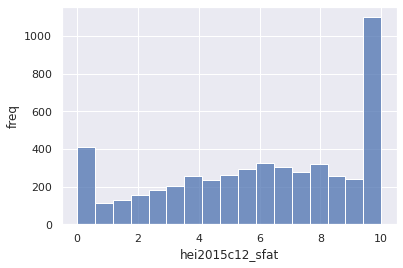

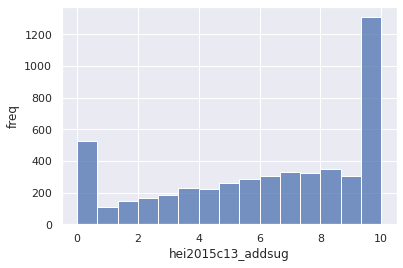

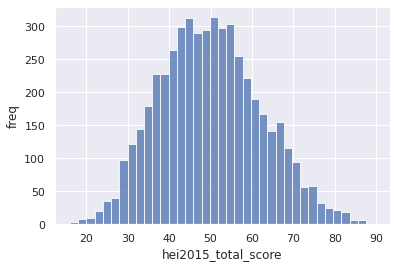

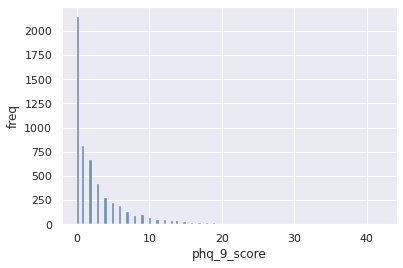

In [12]:
# histogram with a line on the limits of each food limit
for numeric in numerical_variables:
    if numeric != "seqn":
        _ = sns.histplot(x=numeric, data=infer_phq_hei_curated_df)
        _ = plt.xlabel(numeric)
        _ = plt.ylabel("freq")
        plt.show()

We observe that we have three kind of distributions with these variables: 

- some are skewed to right or left (positive or negative)
- some are normal
- and some of them have min and max greater than the rest of the observations:
  - *practically all health eating indexes*


### Looking at missing values

Our data have some missing values, some of then on the health eating indexes and others on `phq_9_score` variable. Here we'll be using the `{{missingno}}` library to help us to better understand those missing values. 

<AxesSubplot:>

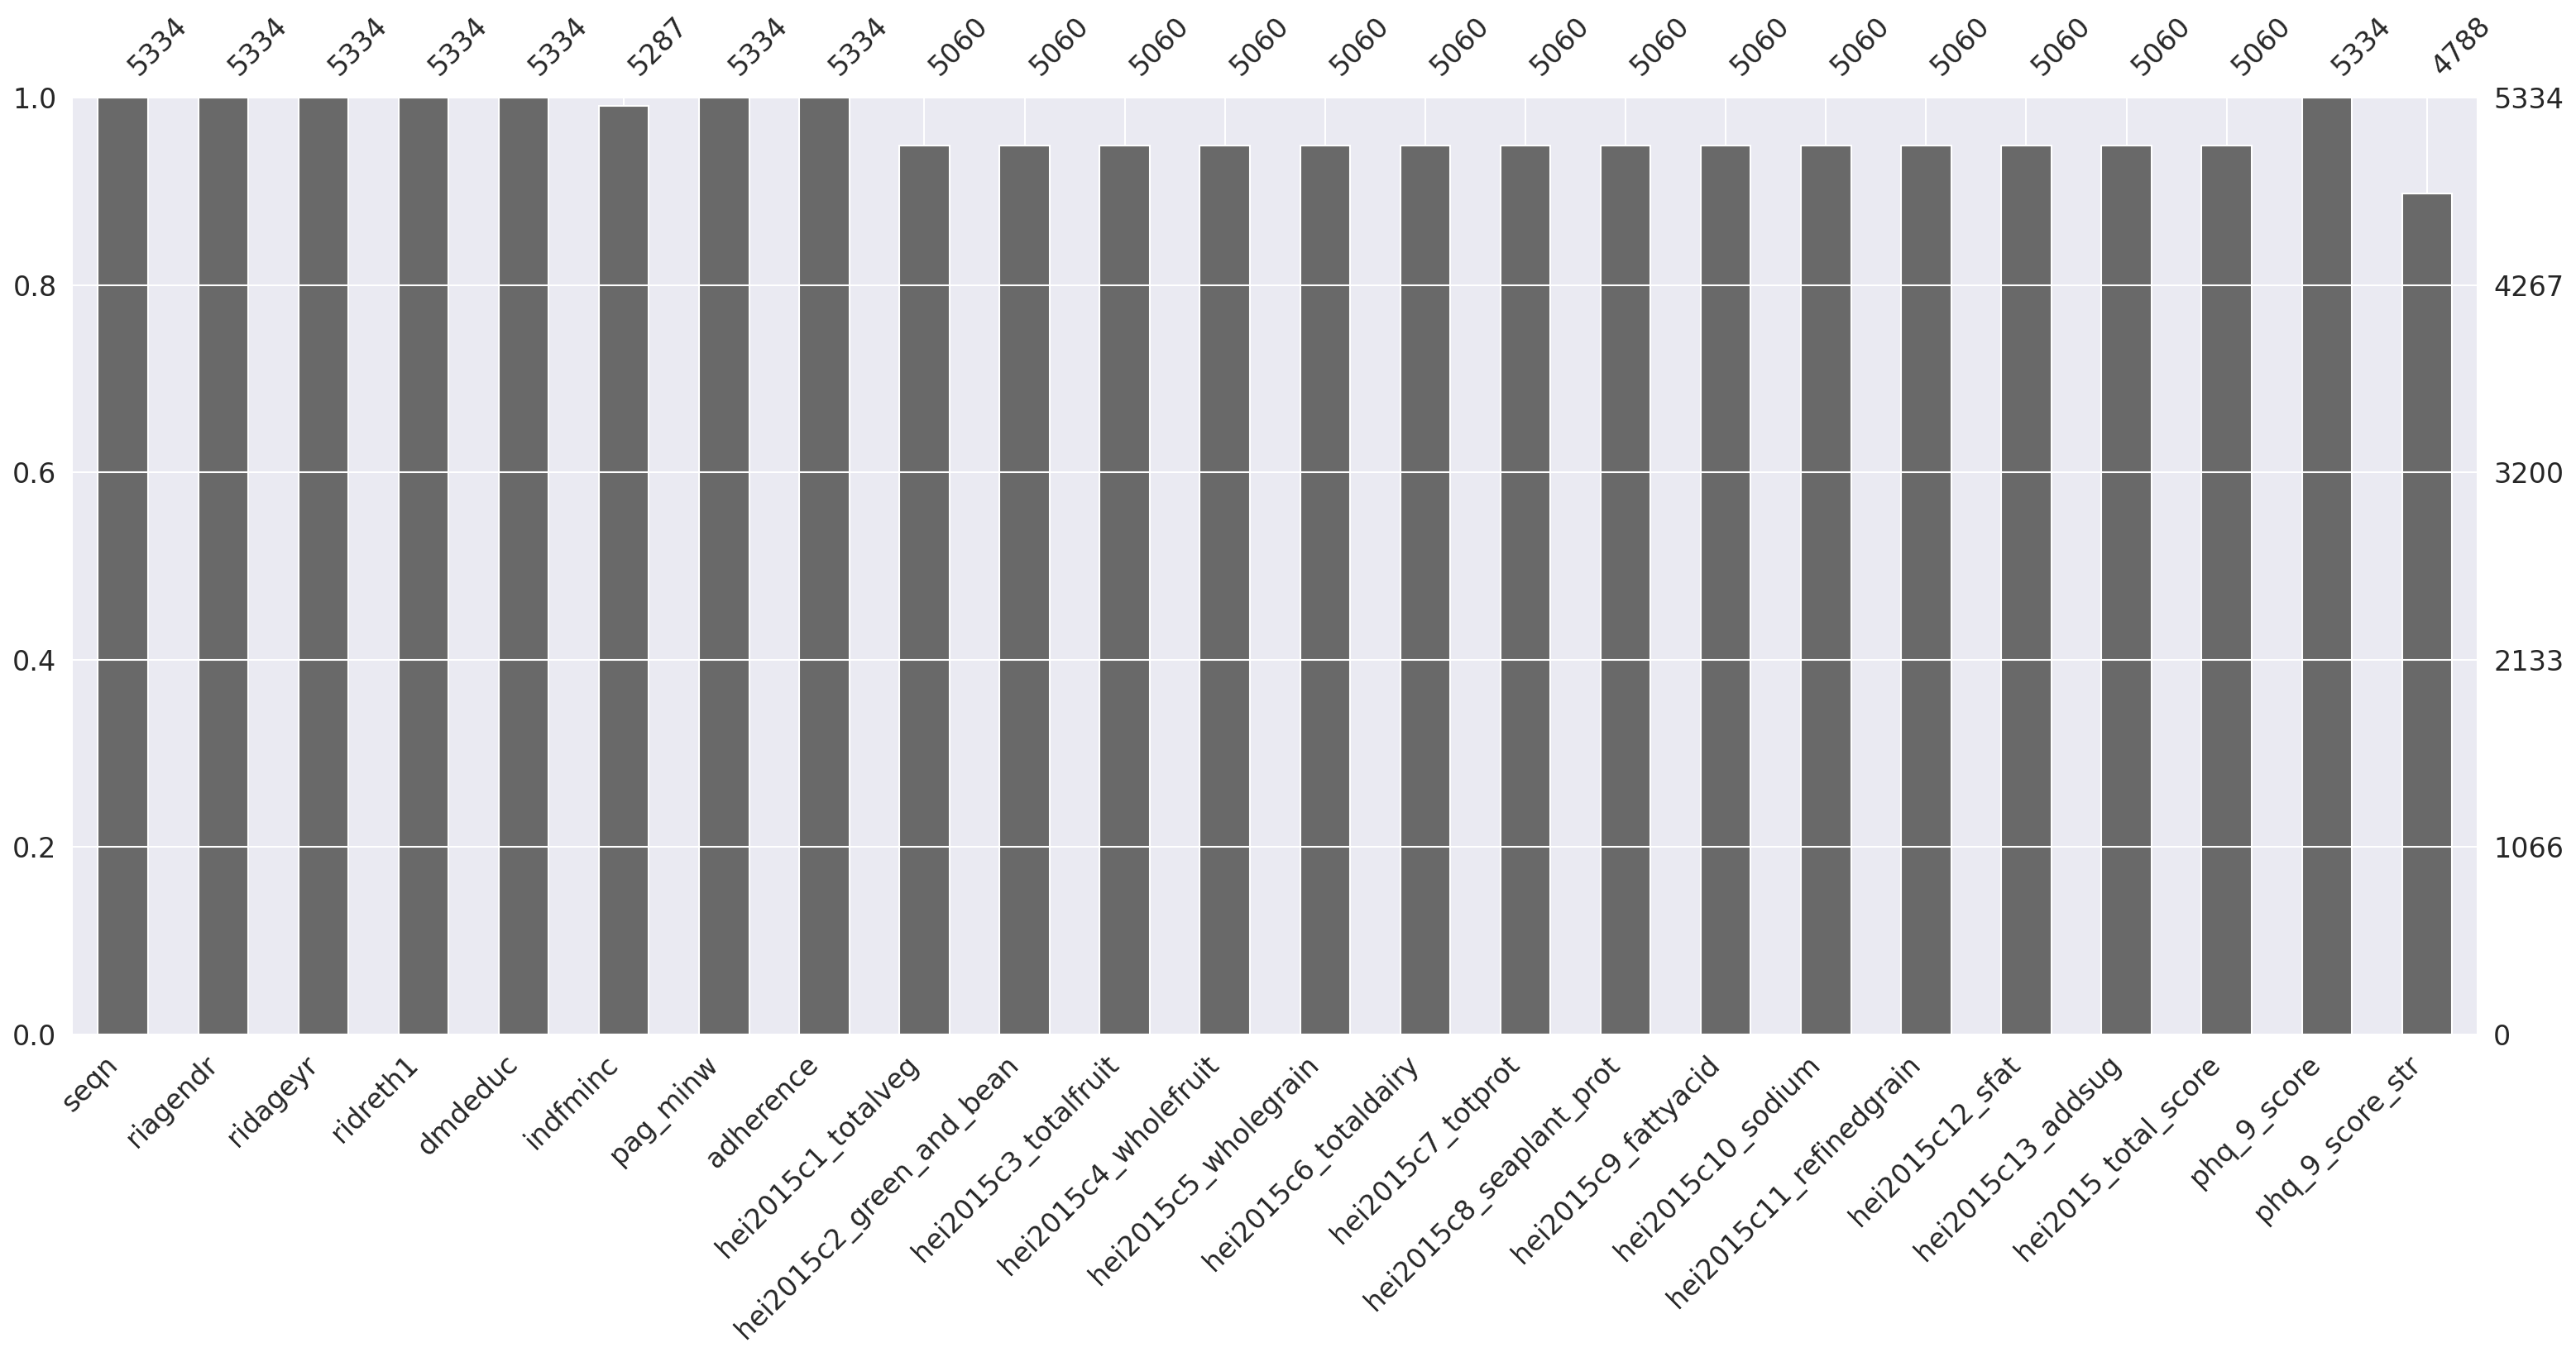

In [99]:
# barplot of those missings
msno.bar(infer_phq_hei_curated_df)

<AxesSubplot:>

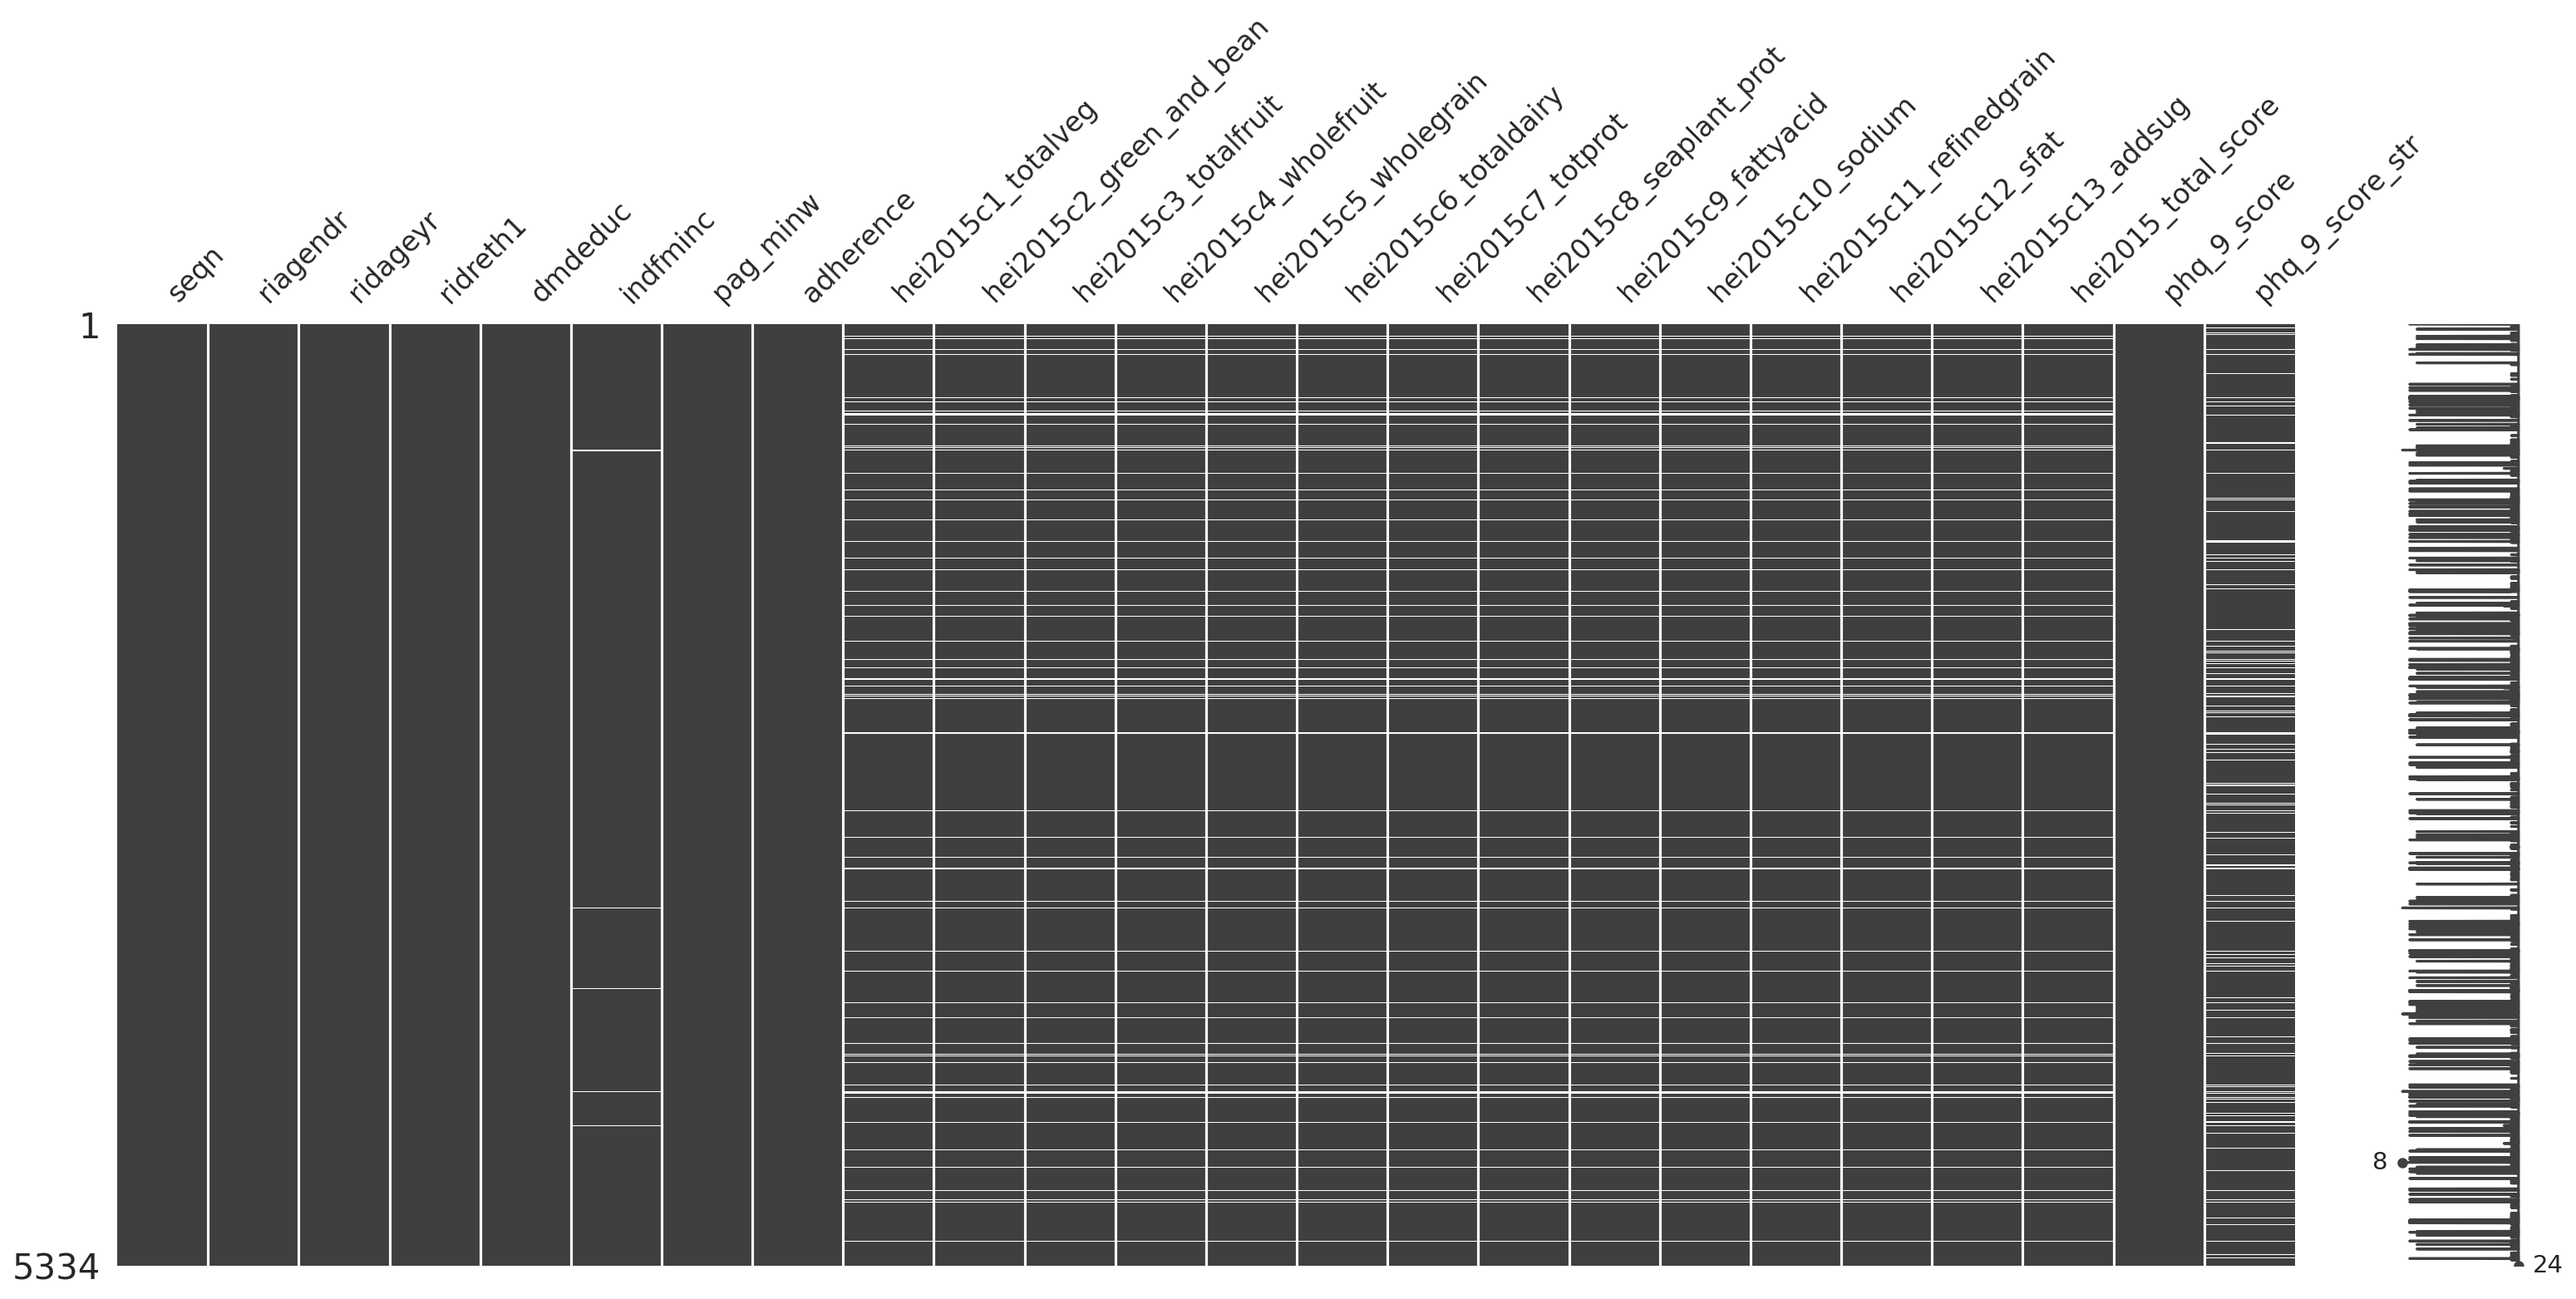

In [100]:
# map on the data and represent the missing values as a white line
# help us to see patterns on the missing data
msno.matrix(infer_phq_hei_curated_df)

Here we're seeing that every missing on the heath eating indexes correspond to the hole line of observation, and in most of the time this is reflected on the missing of the `phq_9_score_str` variable. One great viz offered by the `{{missingno}}` lib is the possibility to plot the correlation between all the missing variables.

<AxesSubplot:>

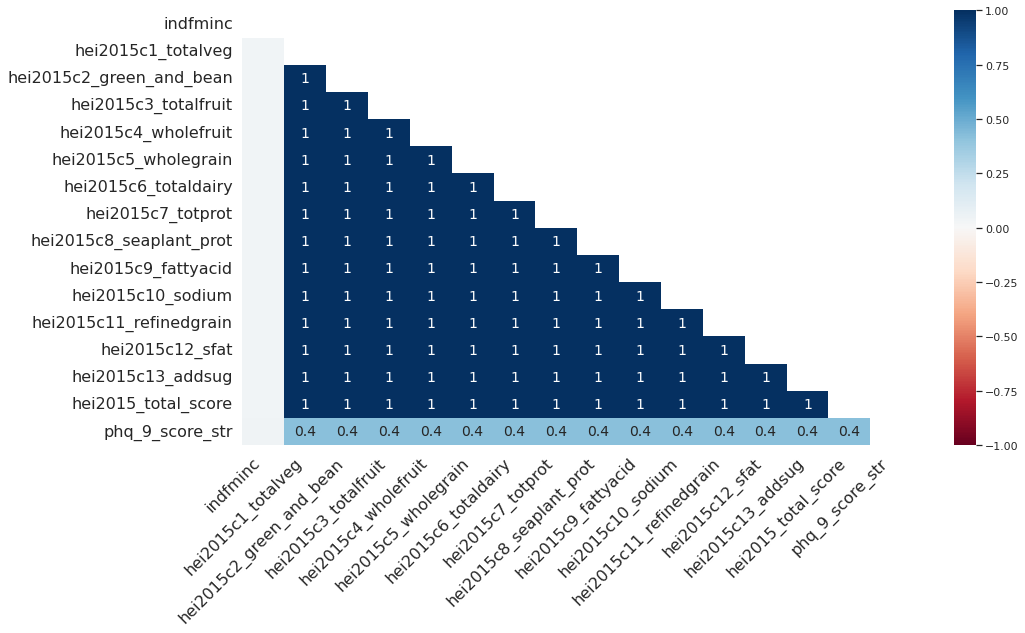

In [15]:
# plotting the correlation between missing variables
msno.heatmap(infer_phq_hei_curated_df, figsize=(15, 8))

As you can see, all the health eating indexes have 1 on correlation metric, that's means that if one value on one of those features are missing, probably the rest will be too. And, all these indexes are 0.4 correlated to the `phq_9_score_str`.

As was said before, some answers for the **phq_9 survey** was missing, and because of that we do not addressed any depression label to those cases. This approach end up generating **546 missing values** on our dataset. As this is our most important feature, I'll be performing some kind of imputation here.

To summarize the strategy used for handling all the missing values here, I create the following schema:

<center><img src="../img/missings.png"/></center>

### Imputing Missing Values

As the only variable that we'll be applying some kind of imputation is the `phq_9_score_str`, let's start of that.

In [102]:
# looking ate the missings
infer_phq_hei_curated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   seqn                      5334 non-null   int64   
 1   riagendr                  5334 non-null   category
 2   ridageyr                  5334 non-null   int64   
 3   ridreth1                  5334 non-null   category
 4   dmdeduc                   5334 non-null   category
 5   indfminc                  5287 non-null   category
 6   pag_minw                  5334 non-null   float64 
 7   adherence                 5334 non-null   category
 8   hei2015c1_totalveg        5060 non-null   float64 
 9   hei2015c2_green_and_bean  5060 non-null   float64 
 10  hei2015c3_totalfruit      5060 non-null   float64 
 11  hei2015c4_wholefruit      5060 non-null   float64 
 12  hei2015c5_wholegrain      5060 non-null   float64 
 13  hei2015c6_totaldairy      5060 non-null   float6

Here, I'll be using the distribution of the `phq_9_score_str` to investigate the probability to take some kind of depression if we randomly collect one observation of this data. To accomplish that, we'll be performing a bootstrap sampling.

Bootstrap sampling is just sampling with replacement, here is a reference from [wikipedia](https://pt.wikipedia.org/wiki/Bootstrapping_(estat%C3%ADstica)).

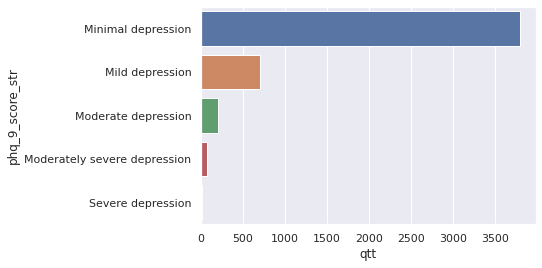

In [17]:
# lets just remember how our phq_9_score_str is distributed
_ = sns.countplot(y="phq_9_score_str", data=infer_phq_hei_curated_df)
_ = plt.ylabel("phq_9_score_str")
_ = plt.xlabel("qtt")
plt.show()

See, we have a lot of *"Minimal depression"*, so, will be interesting if we could measure the probability of select on of those kind of depression, based on this distribution. Let's do this!!

In [18]:
# setting seed for reproducibility
np.random.seed(10)

# first, drop the missings on phq_9_score_str
phq_9_score_str_serie = infer_phq_hei_curated_df["phq_9_score_str"].dropna(inplace=False)

# run the experiment 10000 times: collecting just one observation at a time
n_bst = 10000
ten_thousand_bootstrap_sampling = [phq_9_score_str_serie.sample(1).values.tolist()[0] for _ in range(n_bst)]

# Counter will just counting how many observations was observed on each kind of depression type
counting_bootstrap_samples = Counter(ten_thousand_bootstrap_sampling)
counting_bootstrap_samples

Counter({'Minimal depression': 7880,
         'Mild depression': 1513,
         'Moderate depression': 440,
         'Moderately severe depression': 141,
         'Severe depression': 26})

In [19]:
# here we'll just take the percentage dividing by the number of time that the experiment was performed
pct_bootstrap_samples = {}
for key, value in counting_bootstrap_samples.items():
    pct_bootstrap_samples[key] = value/n_bst

pct_bootstrap_samples

{'Minimal depression': 0.788,
 'Mild depression': 0.1513,
 'Moderate depression': 0.044,
 'Moderately severe depression': 0.0141,
 'Severe depression': 0.0026}

As you can see from the procedure before, there is approximately 79% chance to be categorized as "Minimal depression". We can use that to impute those missing values. This approach is similar to take the mode of that variable, but it's a lot flexible and you can apply to continuos variables too.

One advanced approach could be to create a model to predict the depression str feature, and use that to quantify and evaluate the precision of the prediction on the missing data.

In [104]:
infer_phq_hei_curated_df["phq_9_score_str"].fillna("Minimal depression", inplace=True)
infer_phq_hei_curated_df.dropna(inplace=True)

In [114]:
infer_phq_hei_curated_df.shape

(5019, 24)

In [115]:
infer_phq_hei_curated_df["phq_9_score_str"].value_counts()

Minimal depression              4069
Mild depression                  680
Moderate depression              194
Moderately severe depression      65
Severe depression                 11
Name: phq_9_score_str, dtype: int64

At the end, we goes from 5334 to 5019 observations with imputation of the `phq_9_score_str` and dropping of the rest.

## Bivariete Analysis

Let's now see our target variable by all other categorical variables we have.

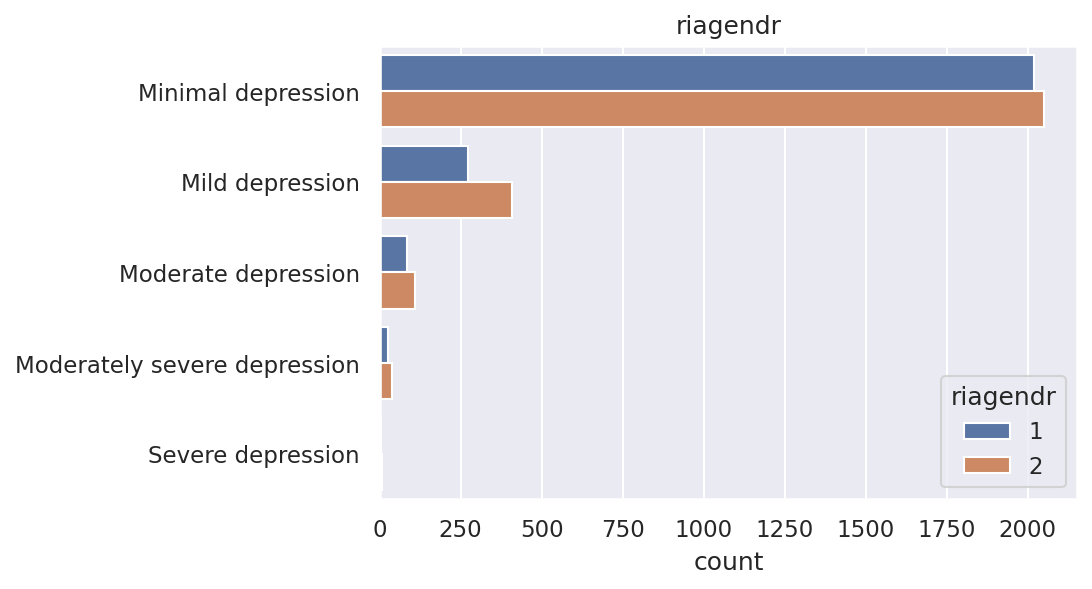

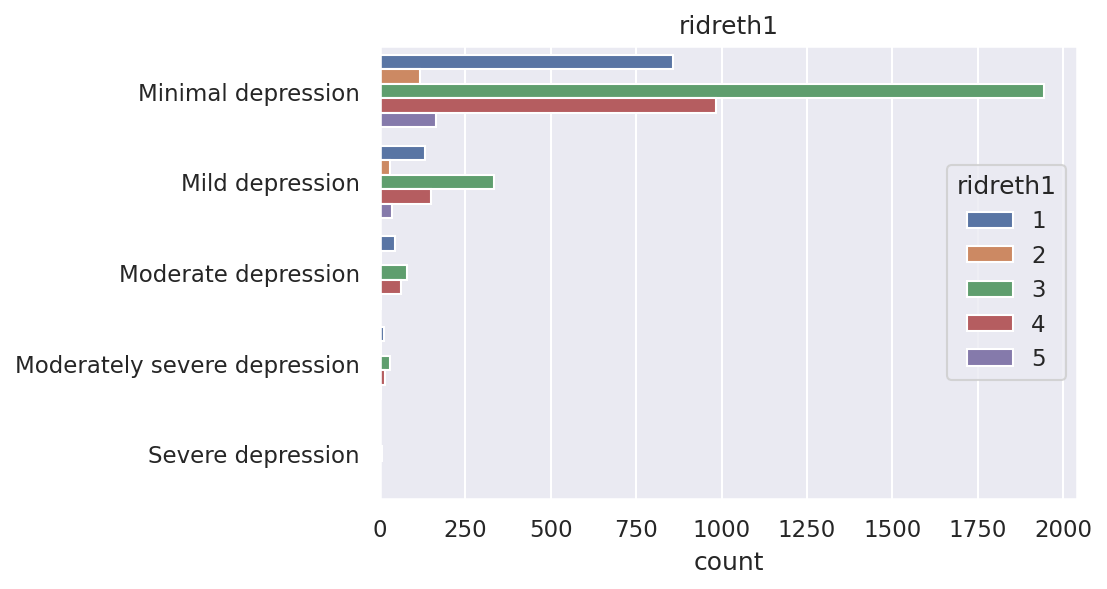

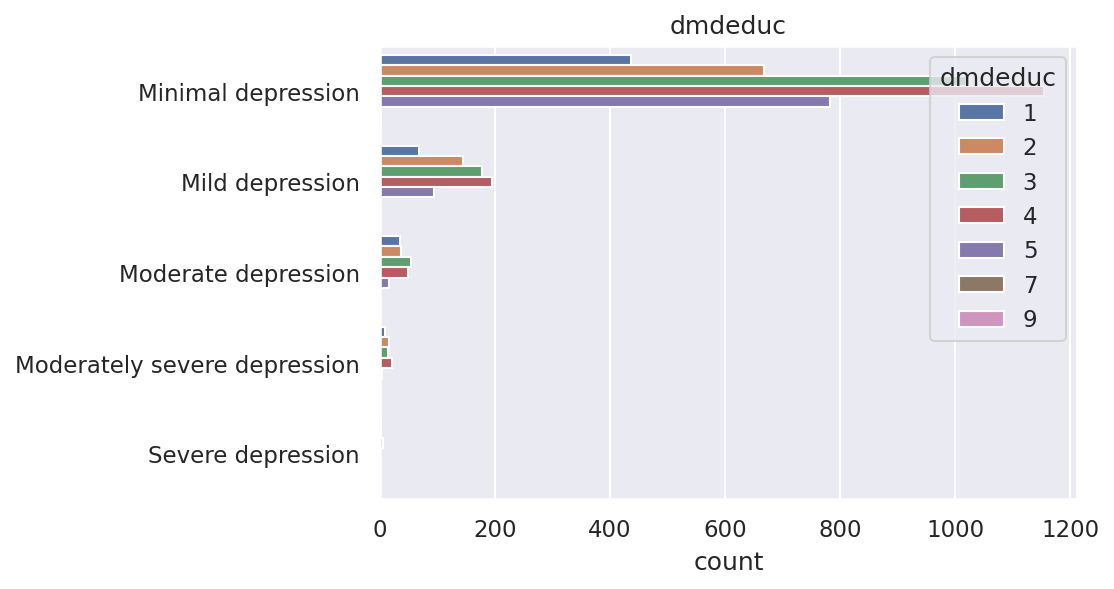

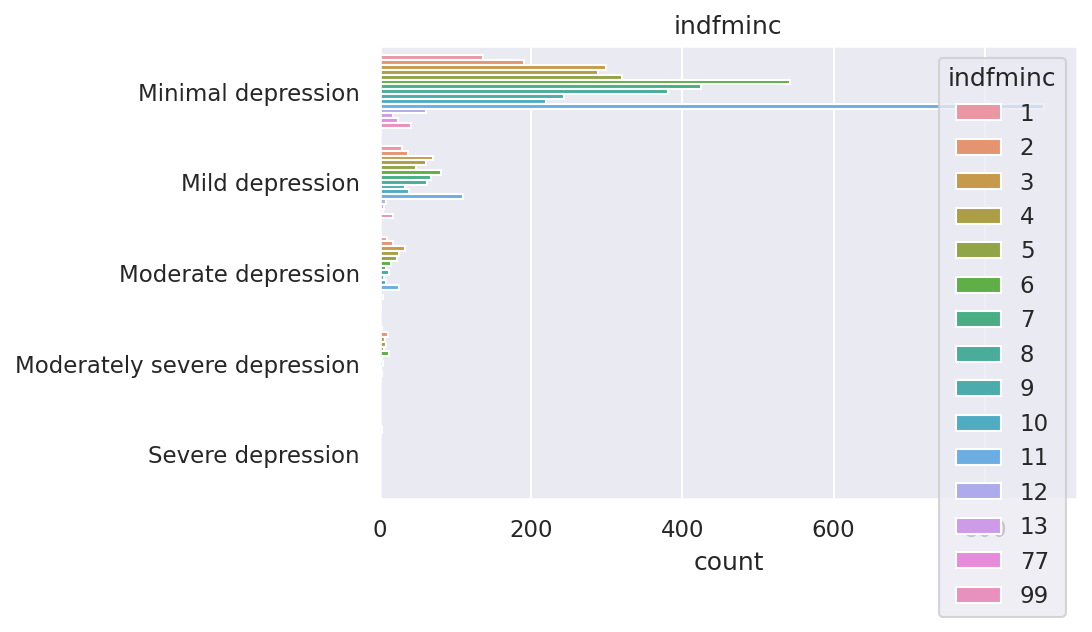

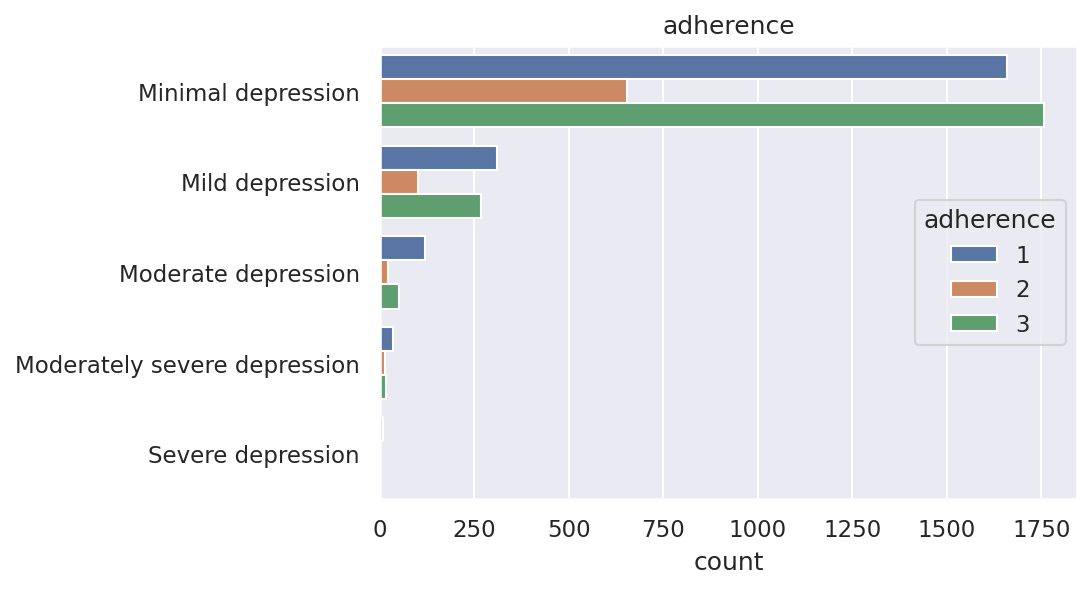

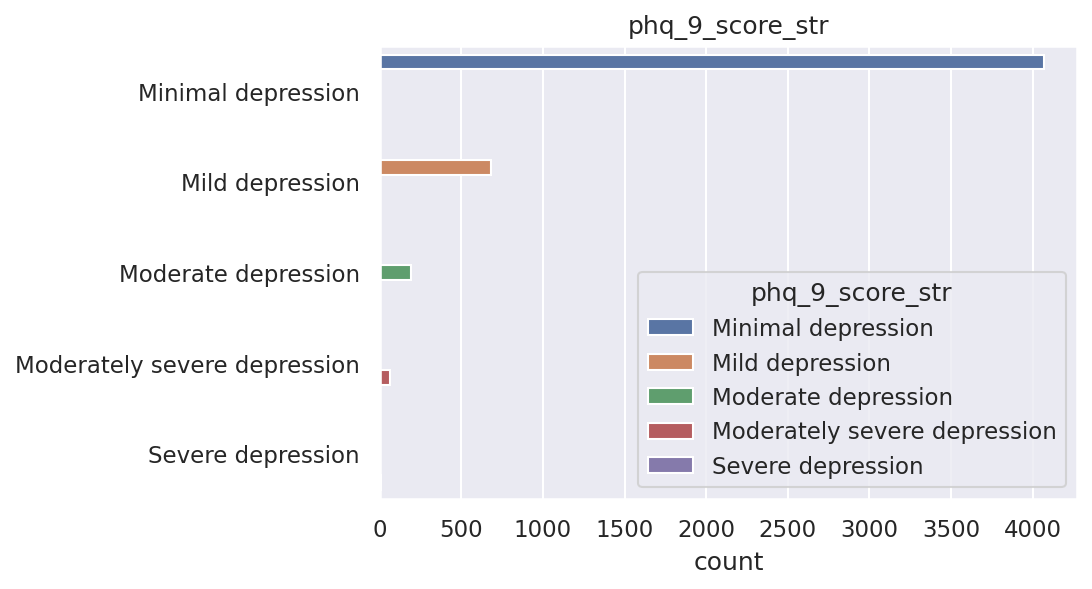

In [123]:
# plotting all categorial variables by the target
for cat_var in categorical_variables:
    ax = sns.countplot(y="phq_9_score_str", data=infer_phq_hei_curated_df, hue=cat_var)
    plt.ylabel("")
    plt.title(cat_var)

    plt.show()

By doing that, apparently we have the same distribution of depression on each one of those categorical features.

And also, let's see how our numerical variables are expressed by our target

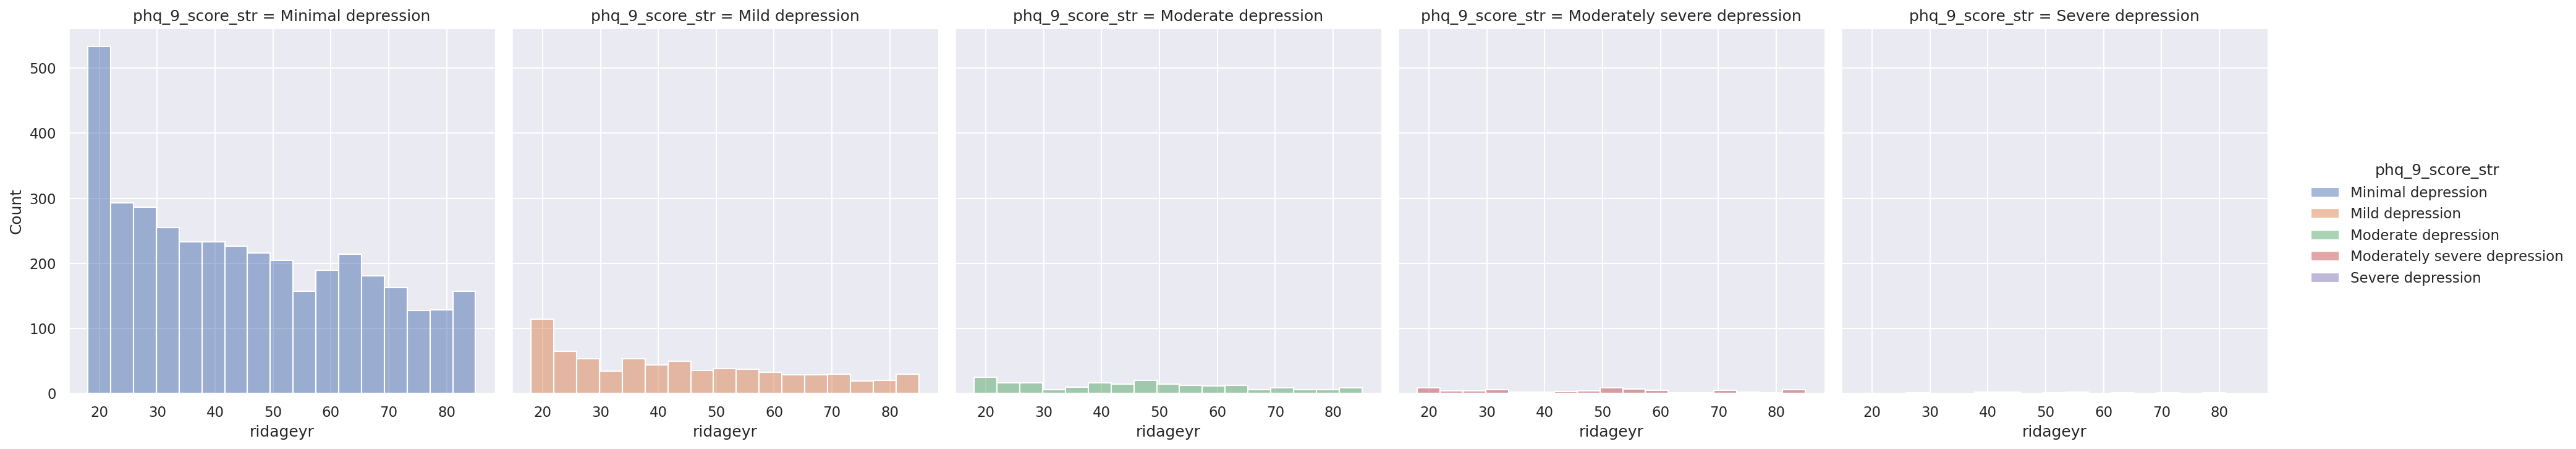

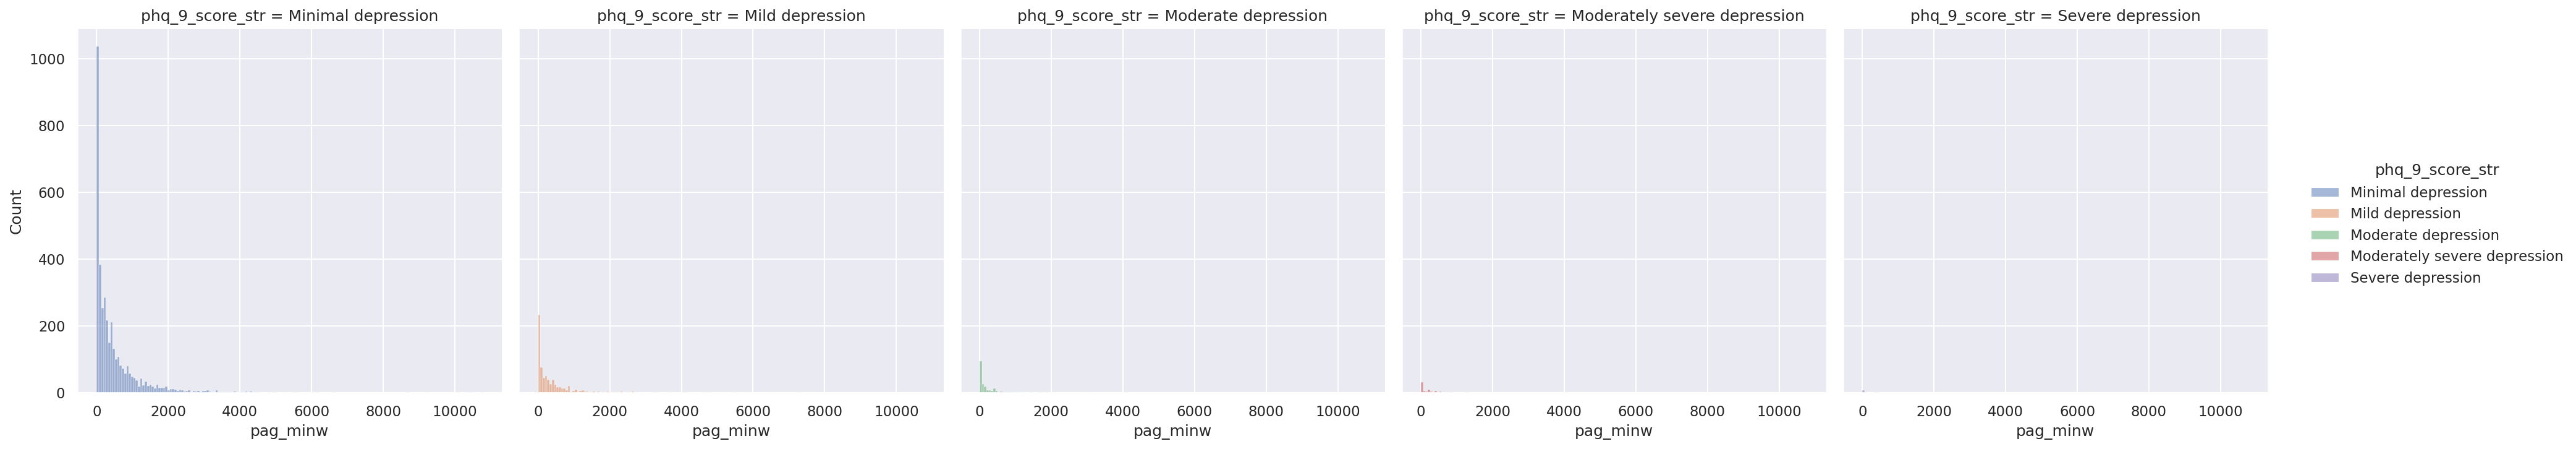

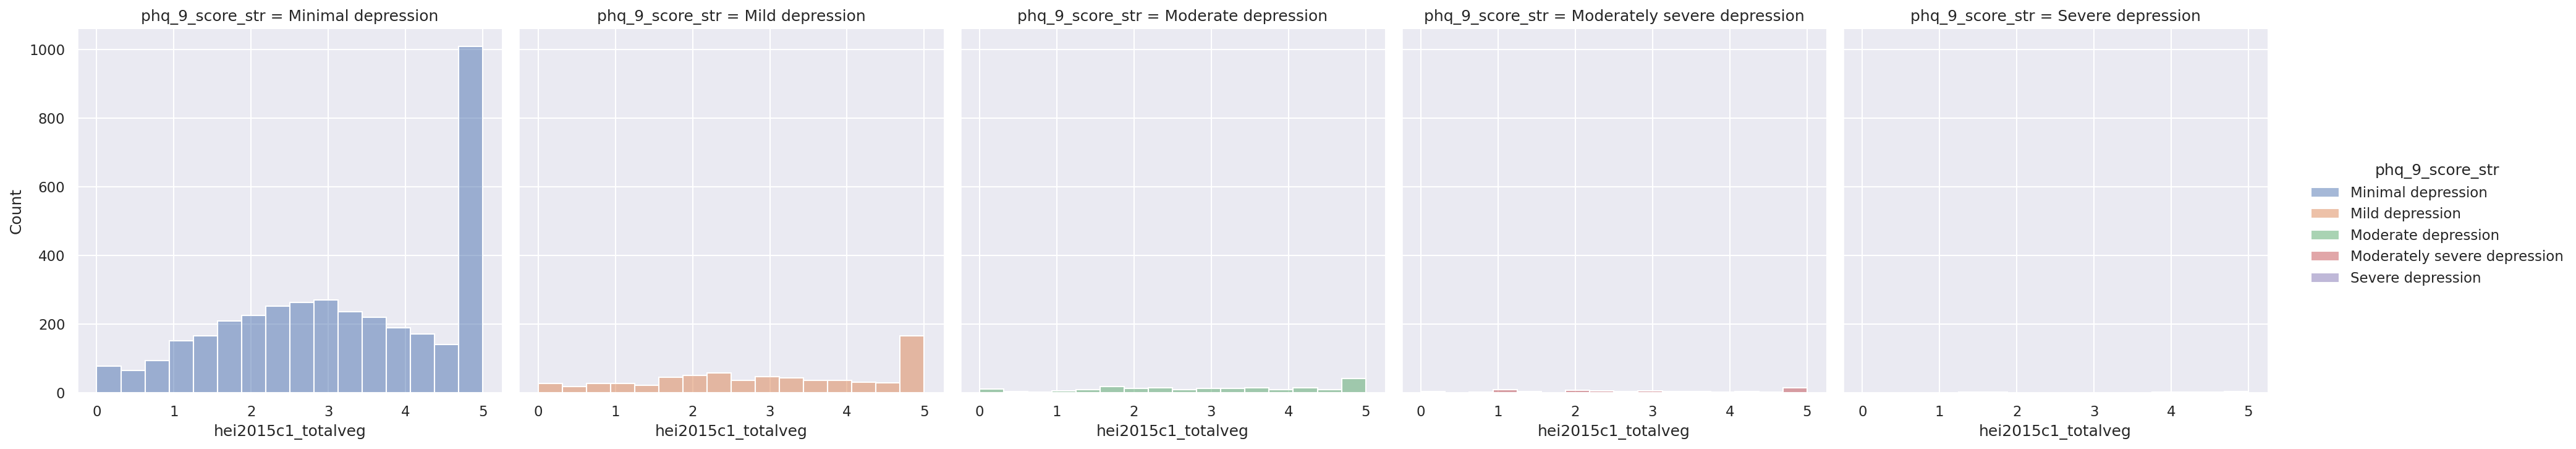

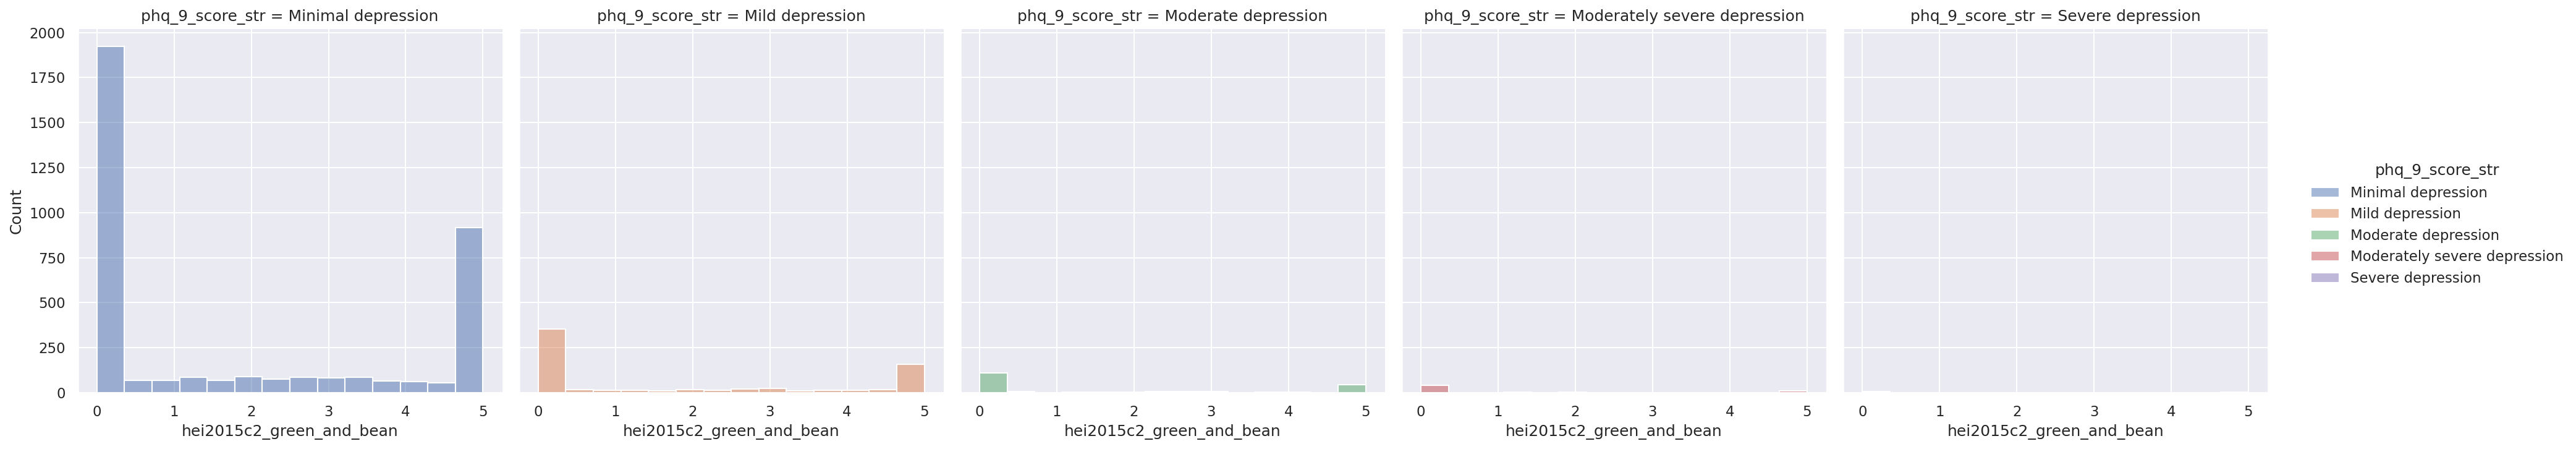

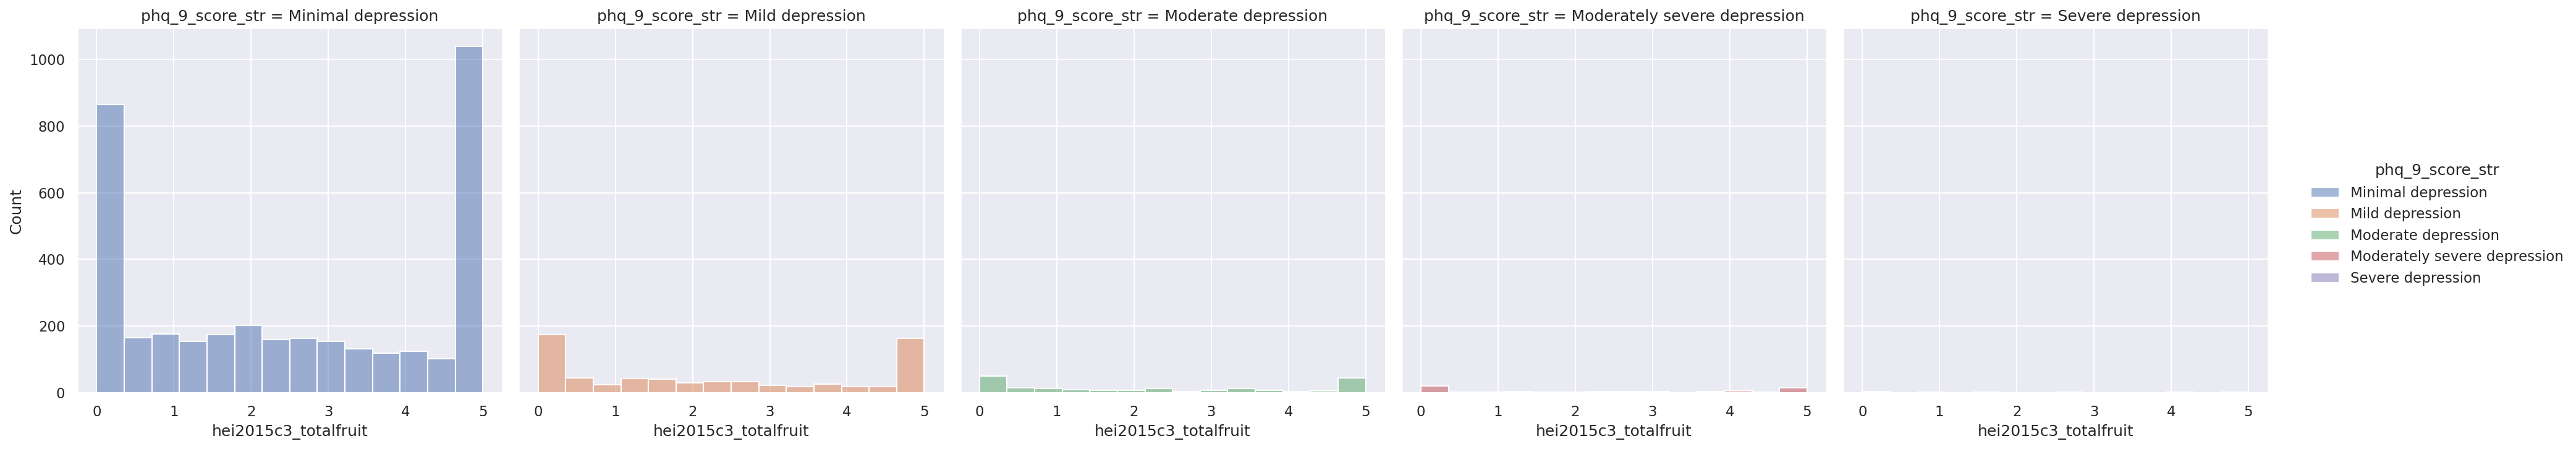

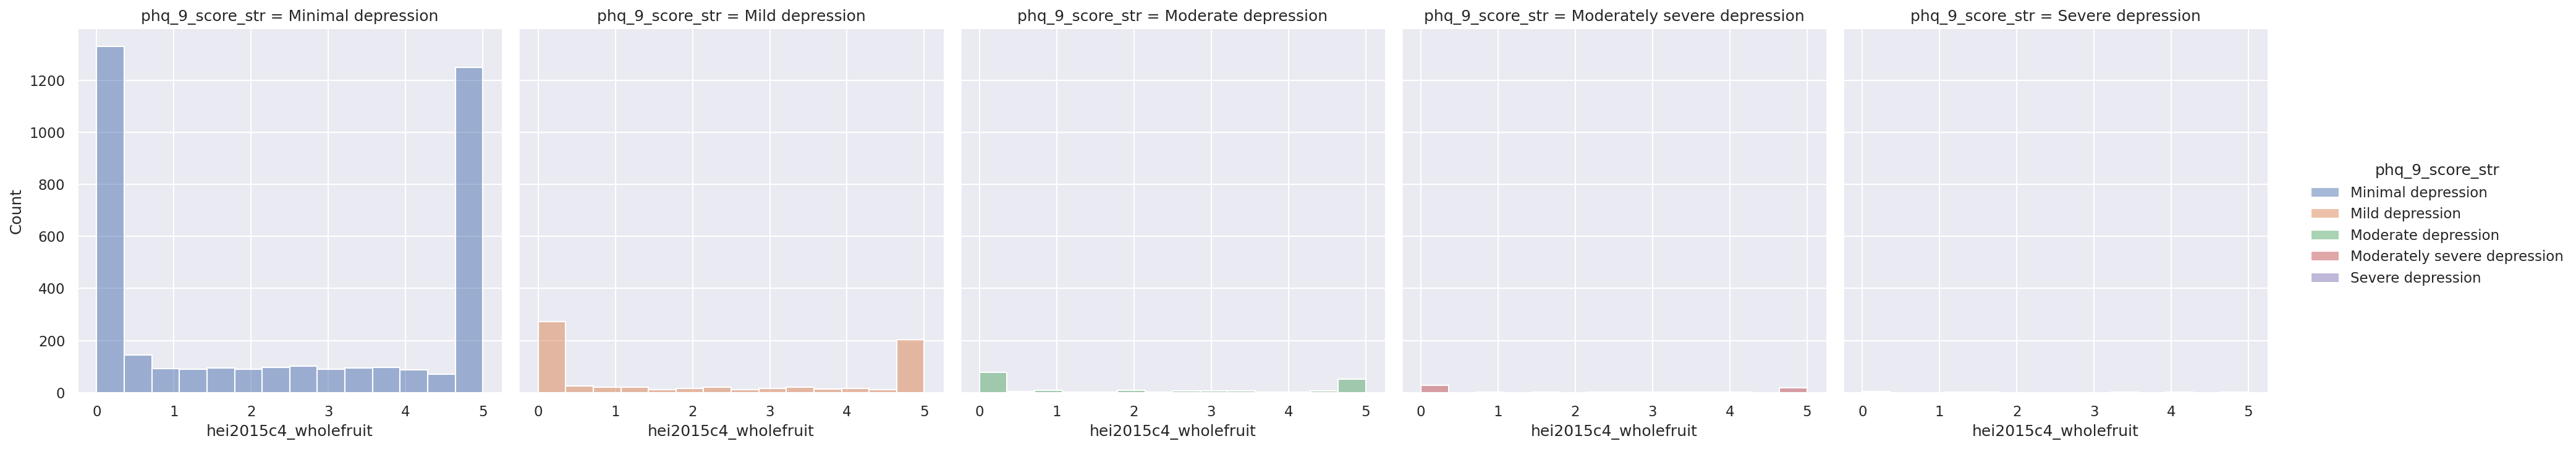

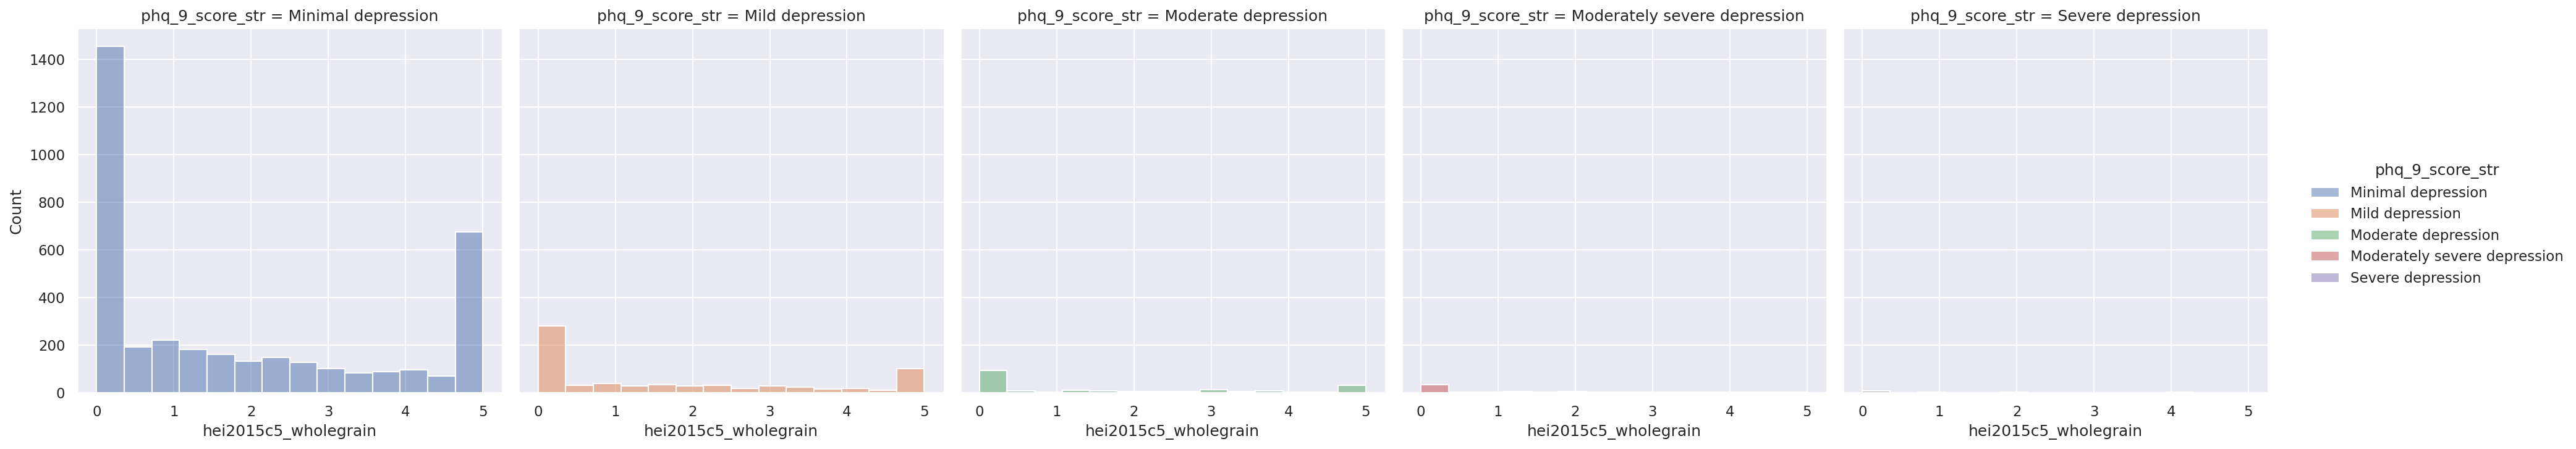

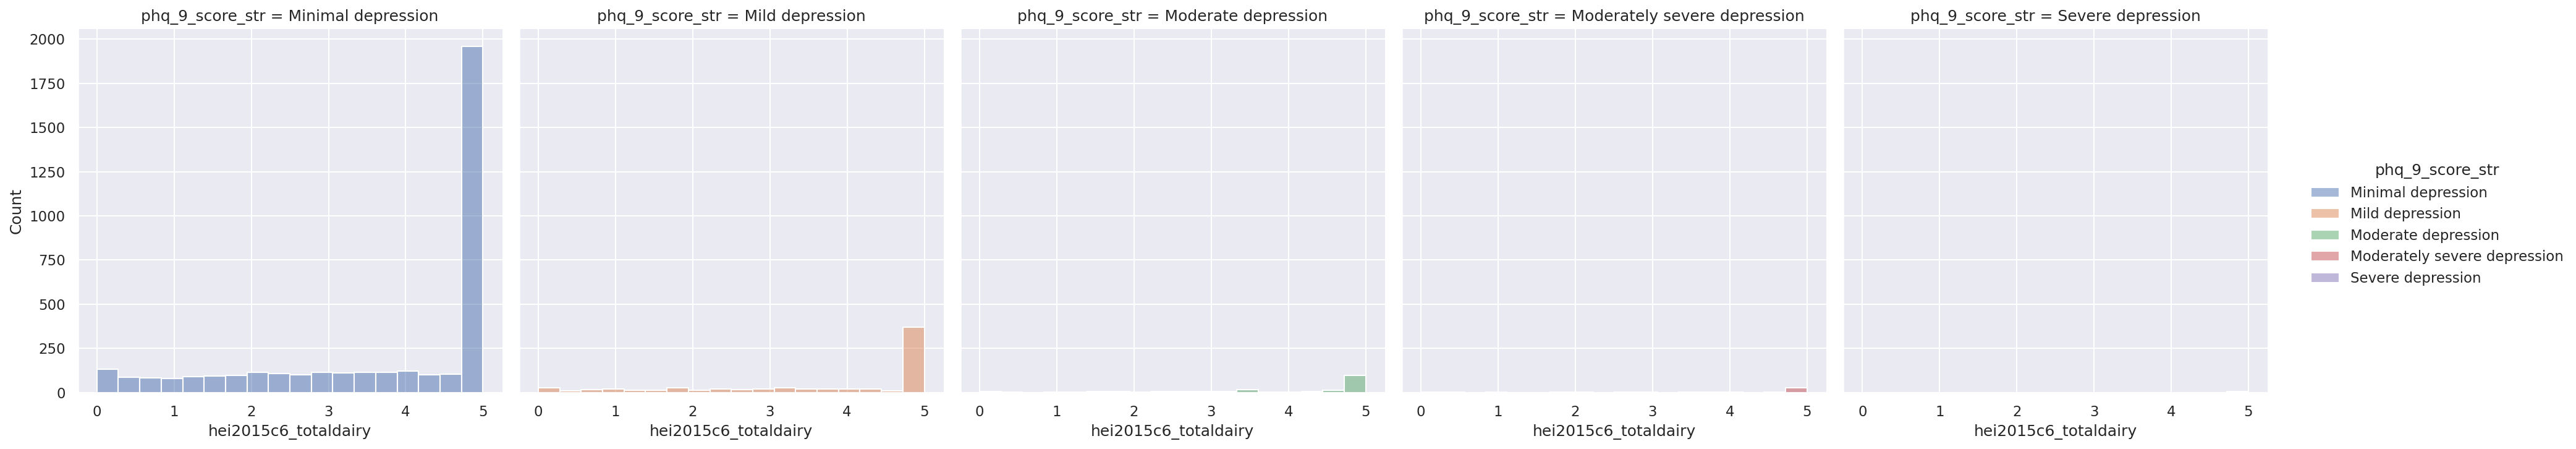

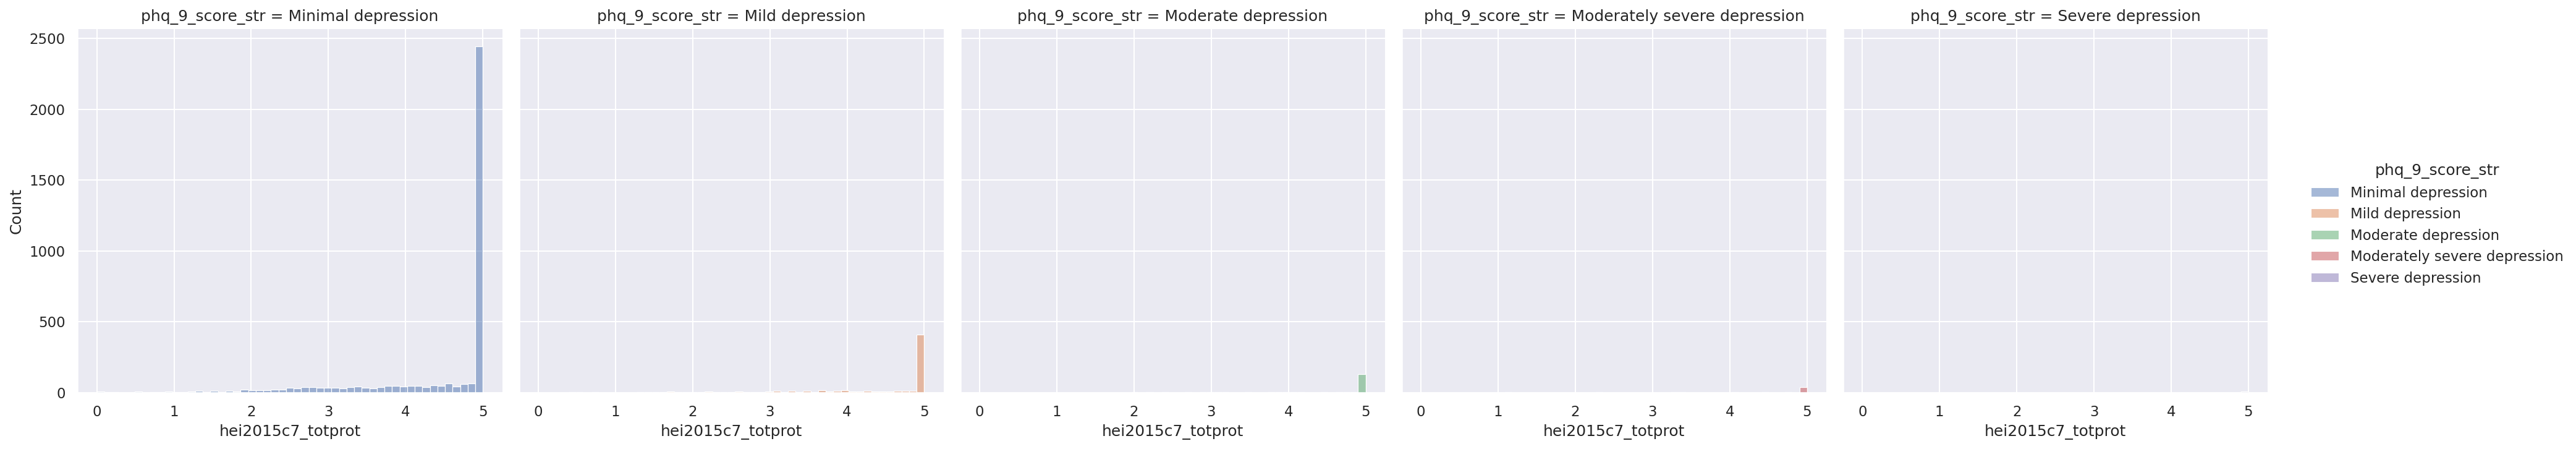

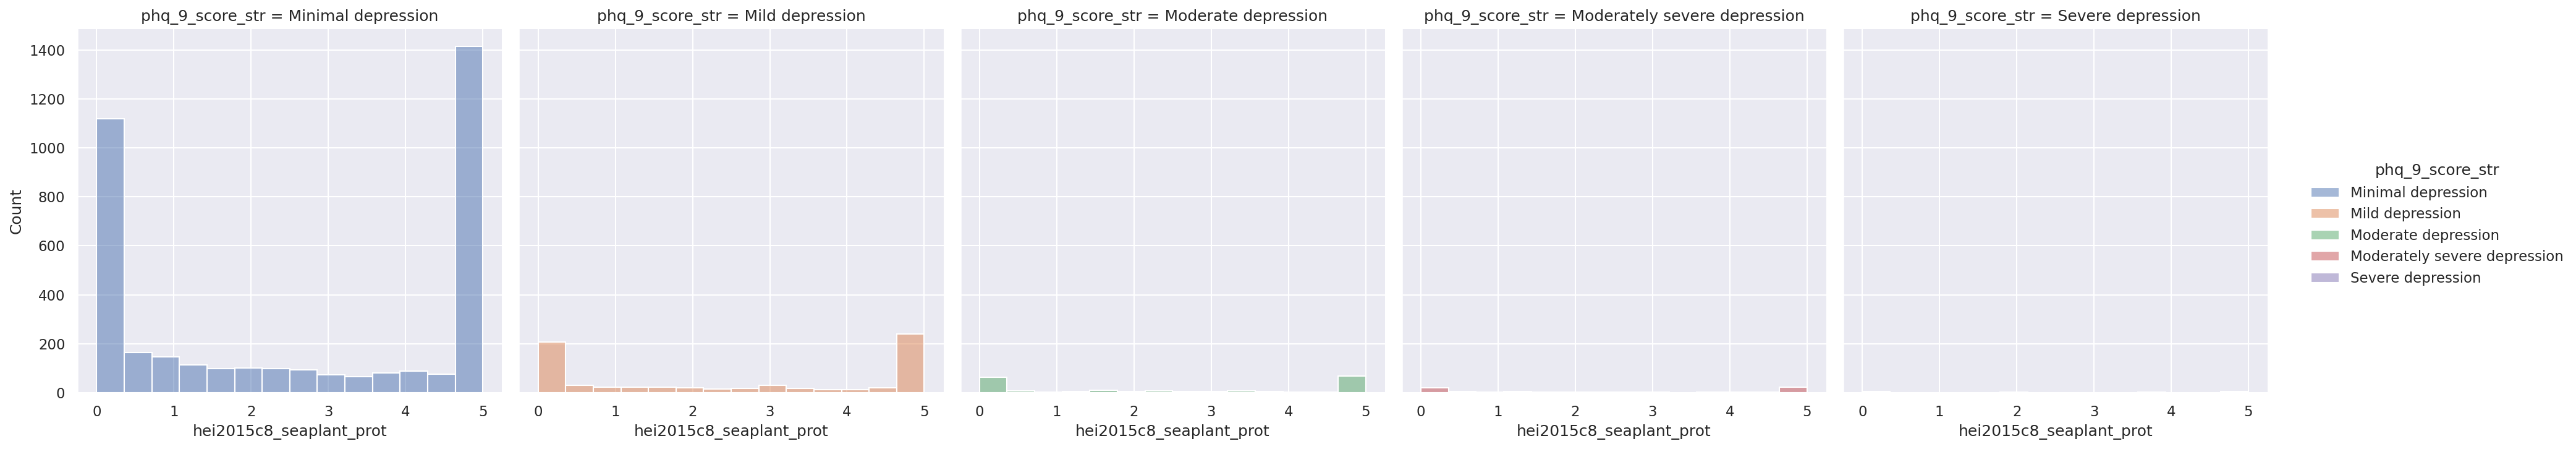

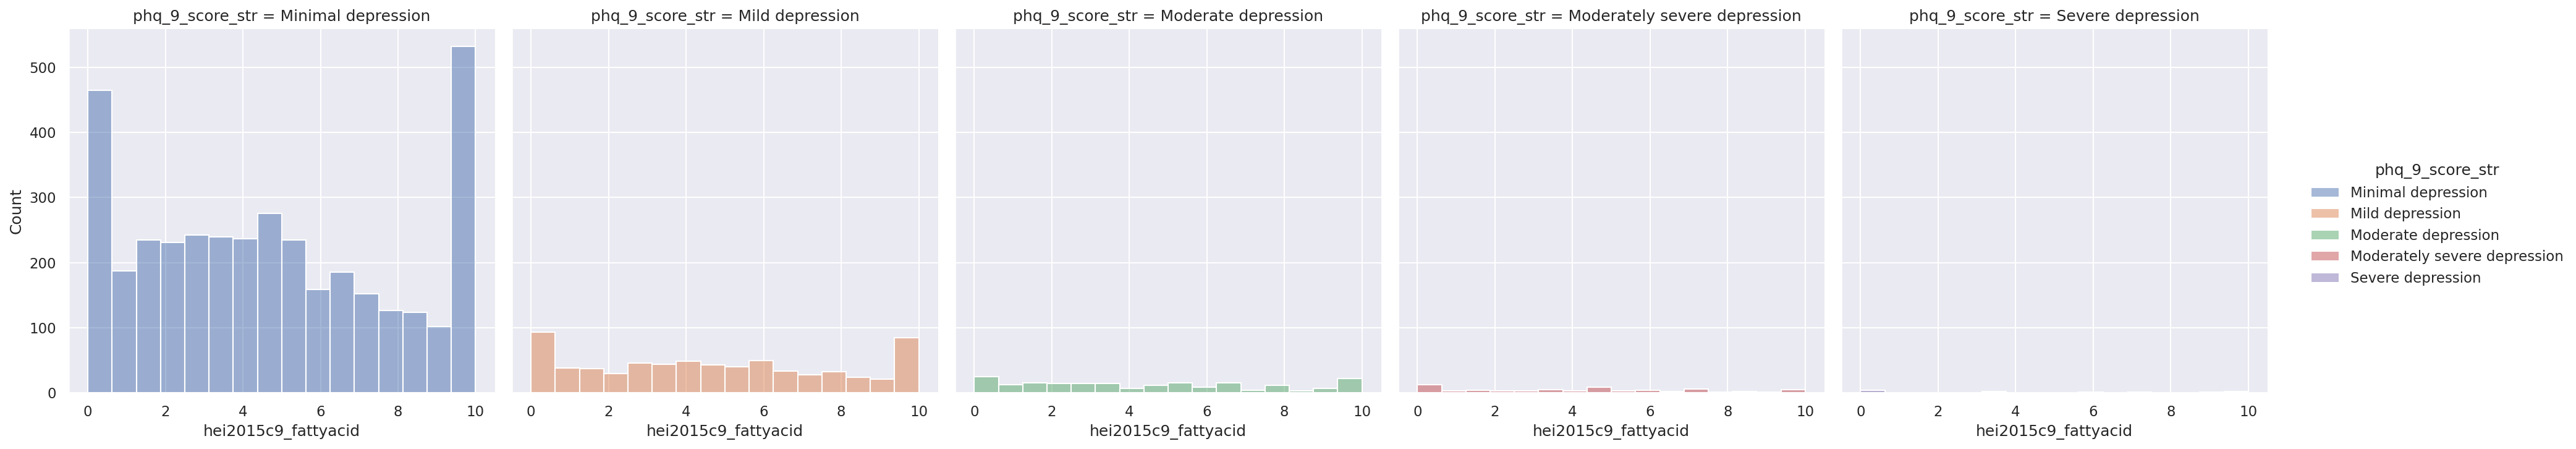

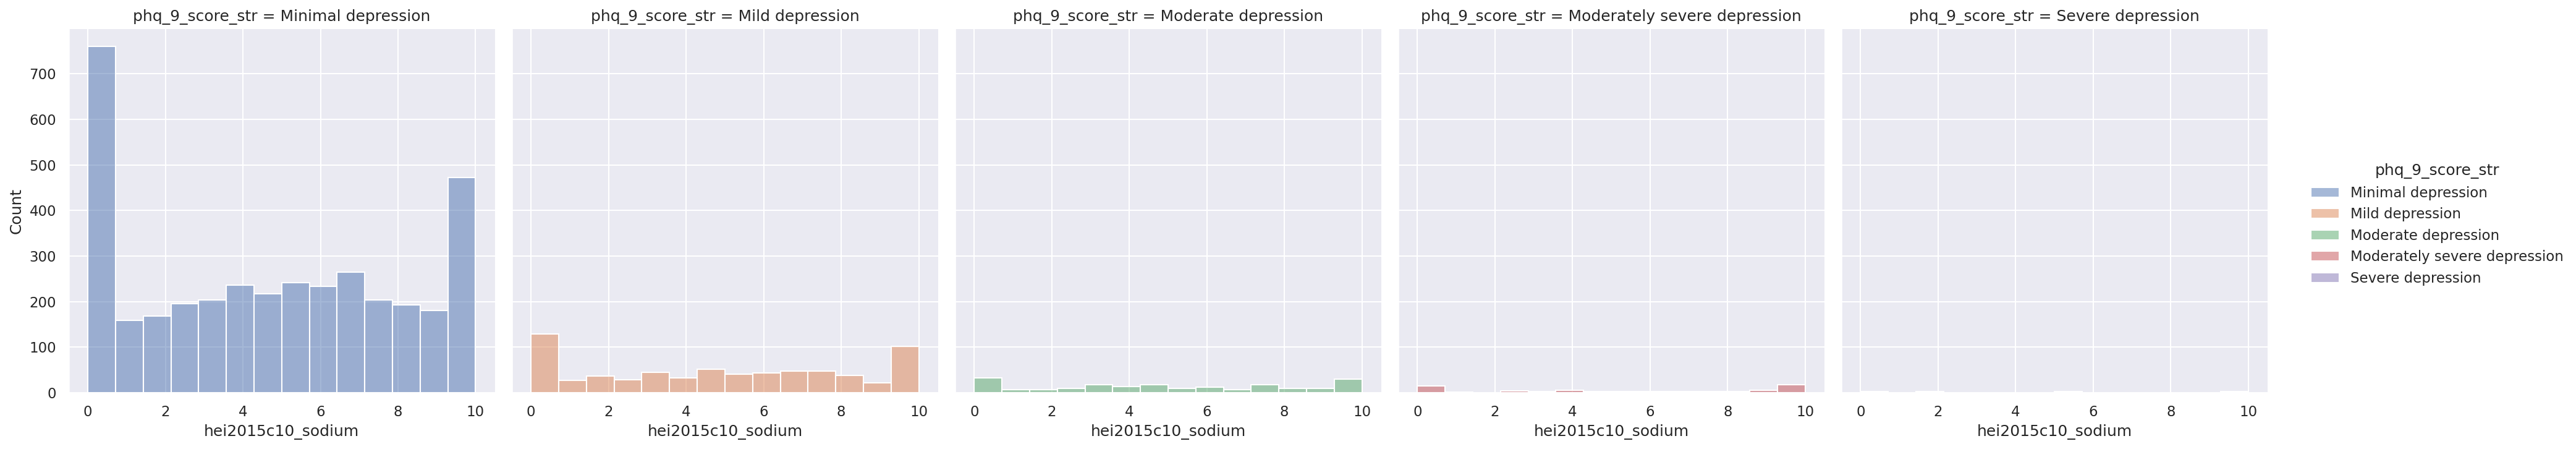

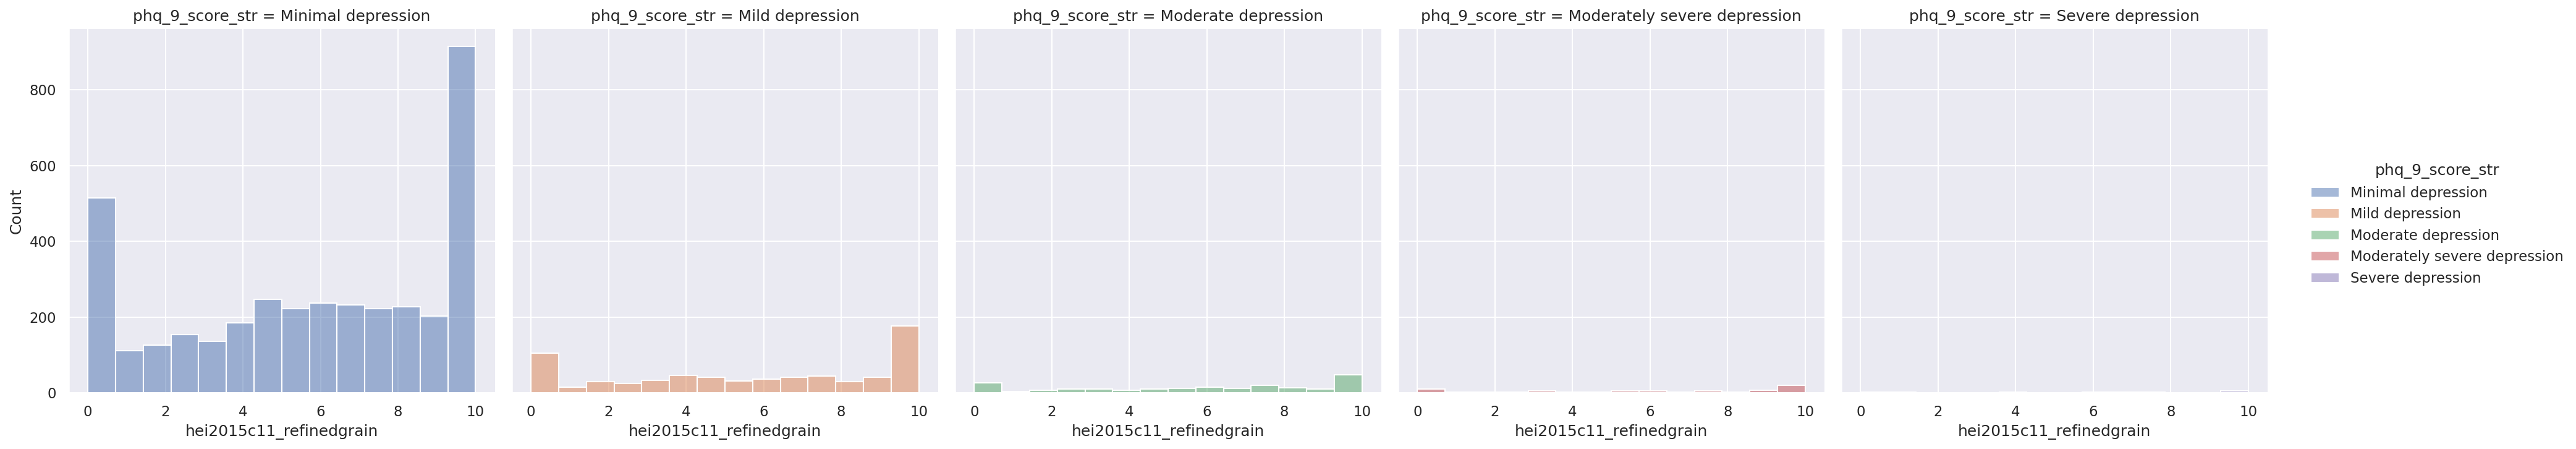

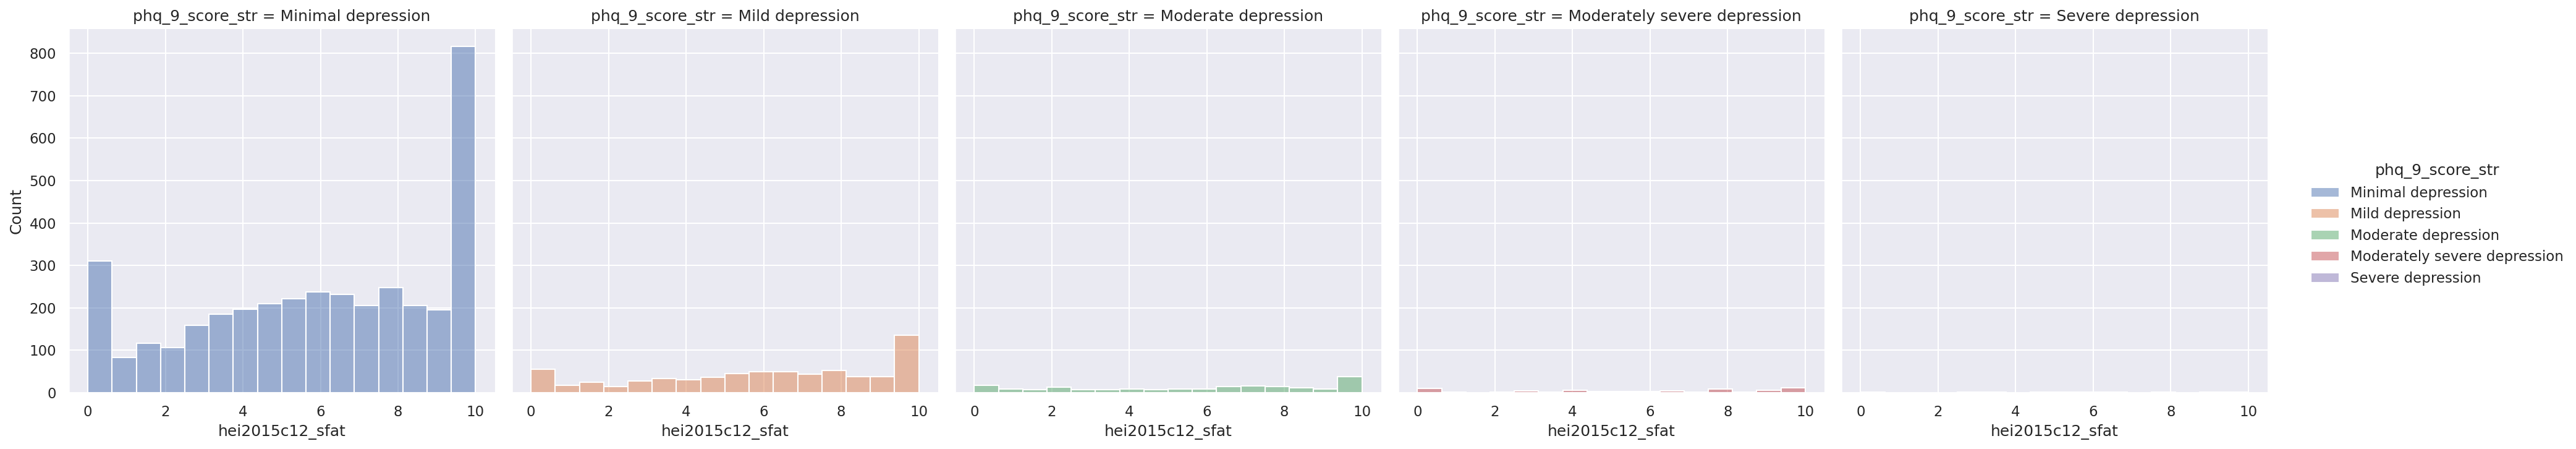

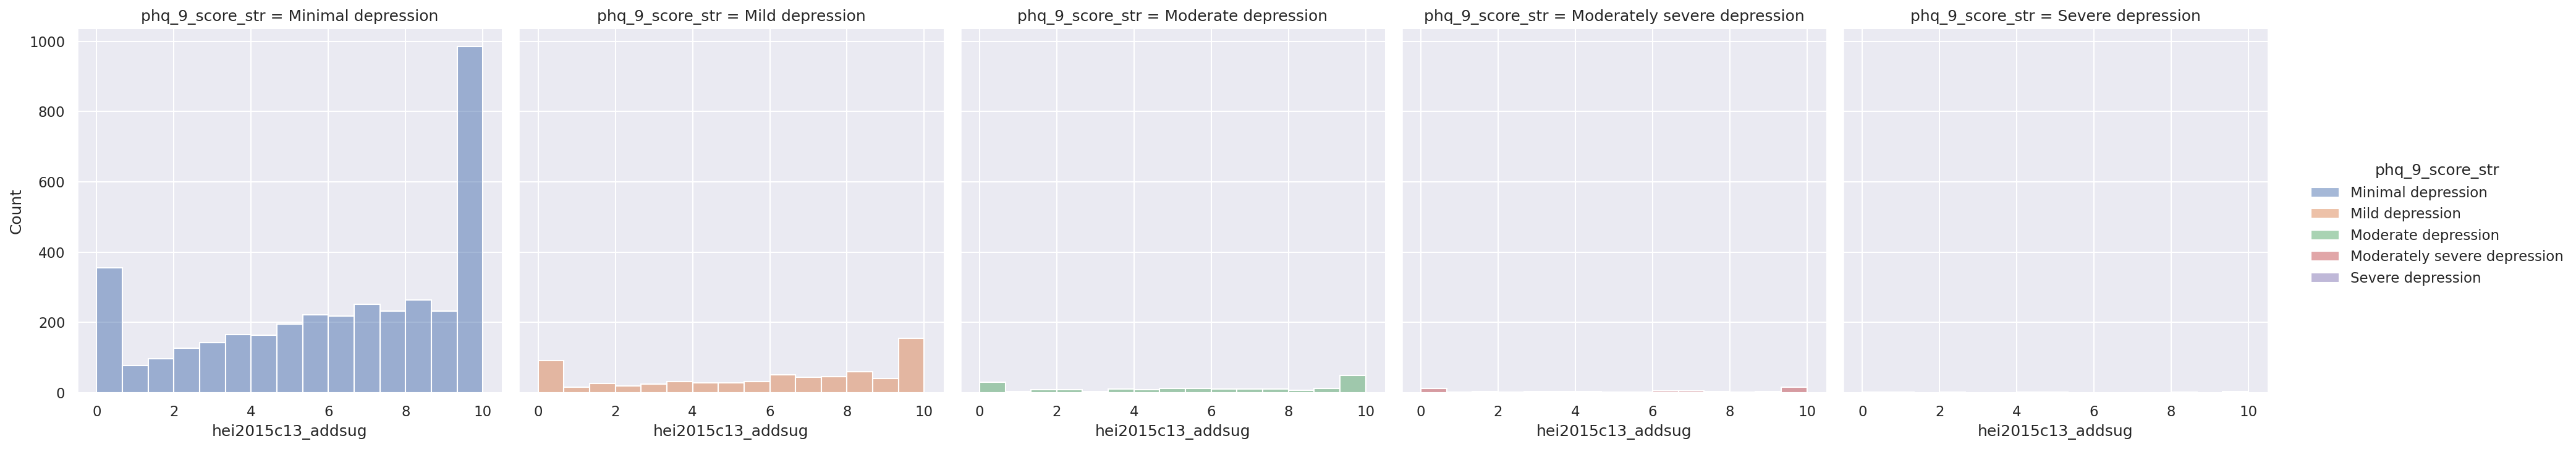

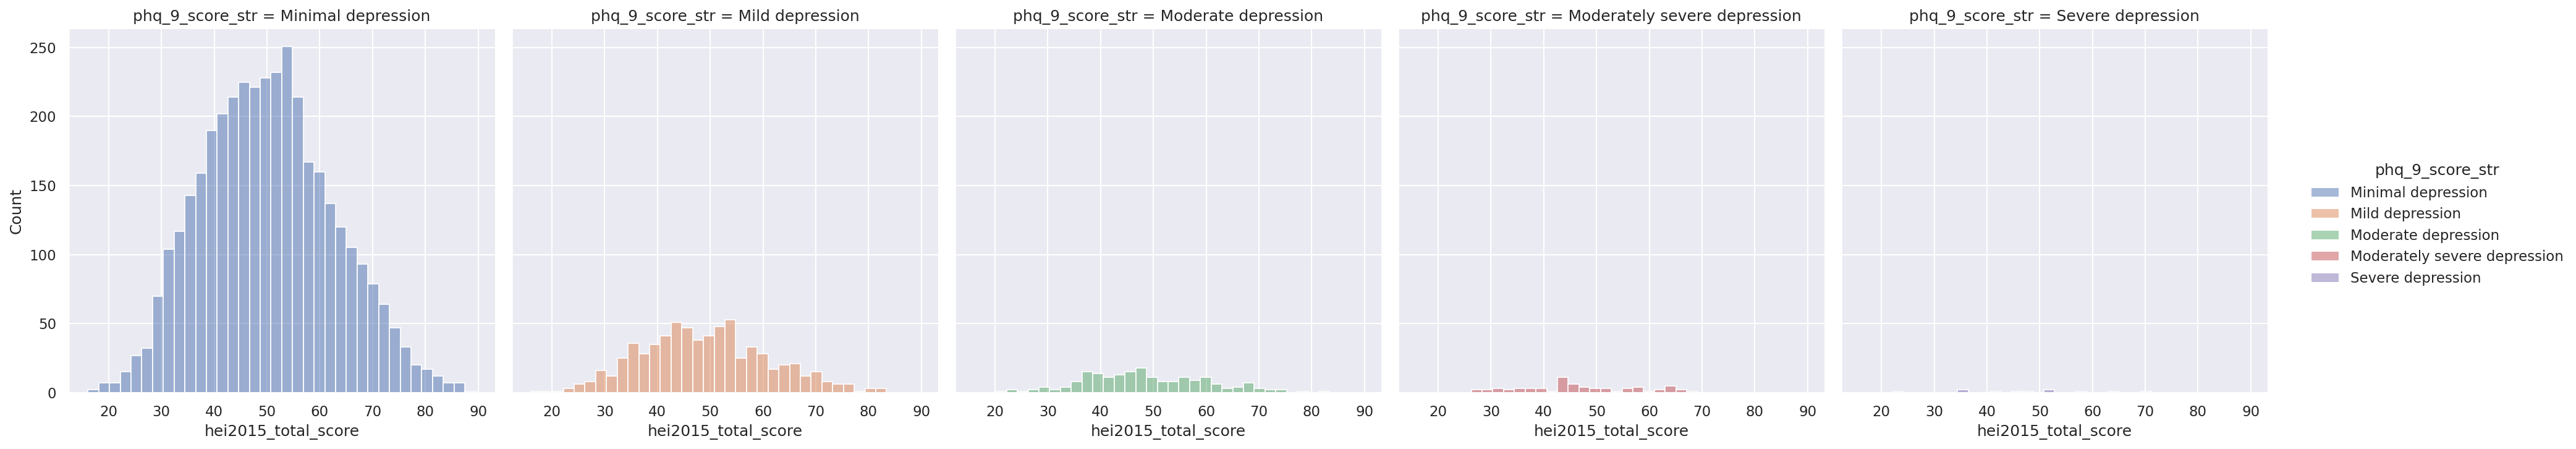

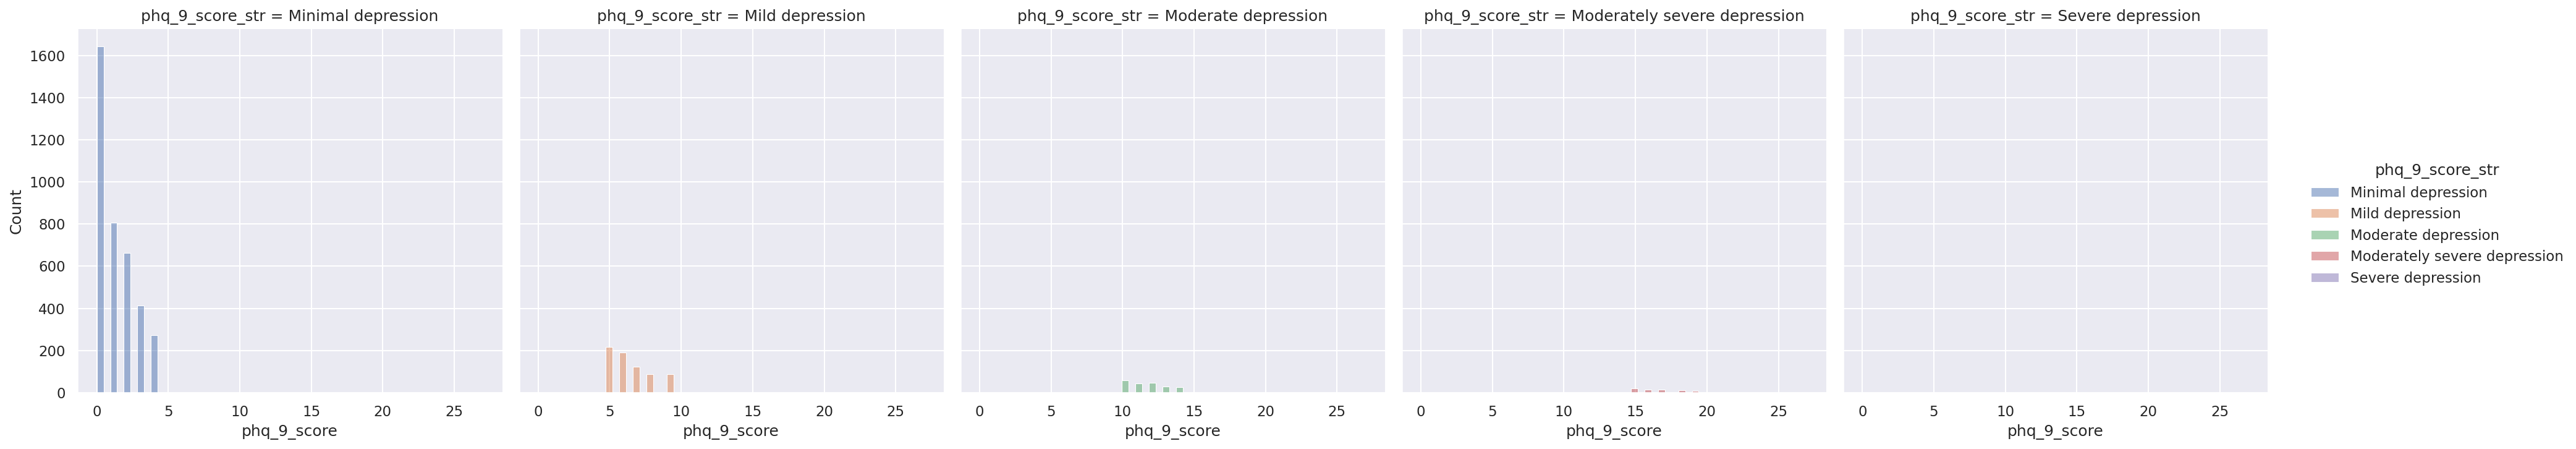

In [85]:
# histogram with a line on the limits of each food limit
for numeric in numerical_variables:
    if numeric != "seqn":
        _ = sns.displot(x=numeric, data=infer_phq_hei_curated_df, hue="phq_9_score_str", col="phq_9_score_str")
        _ = plt.xlabel(numeric)
        _ = plt.ylabel("freq")
        plt.show()

Again, if we look at the distributions on each of one numerical variables, we're seeing very similar shapes of distributions across the variables.

And one more visualization is the correlation plot, where we goes to see if the pearson correlation value for each one of the numerical variables we have.

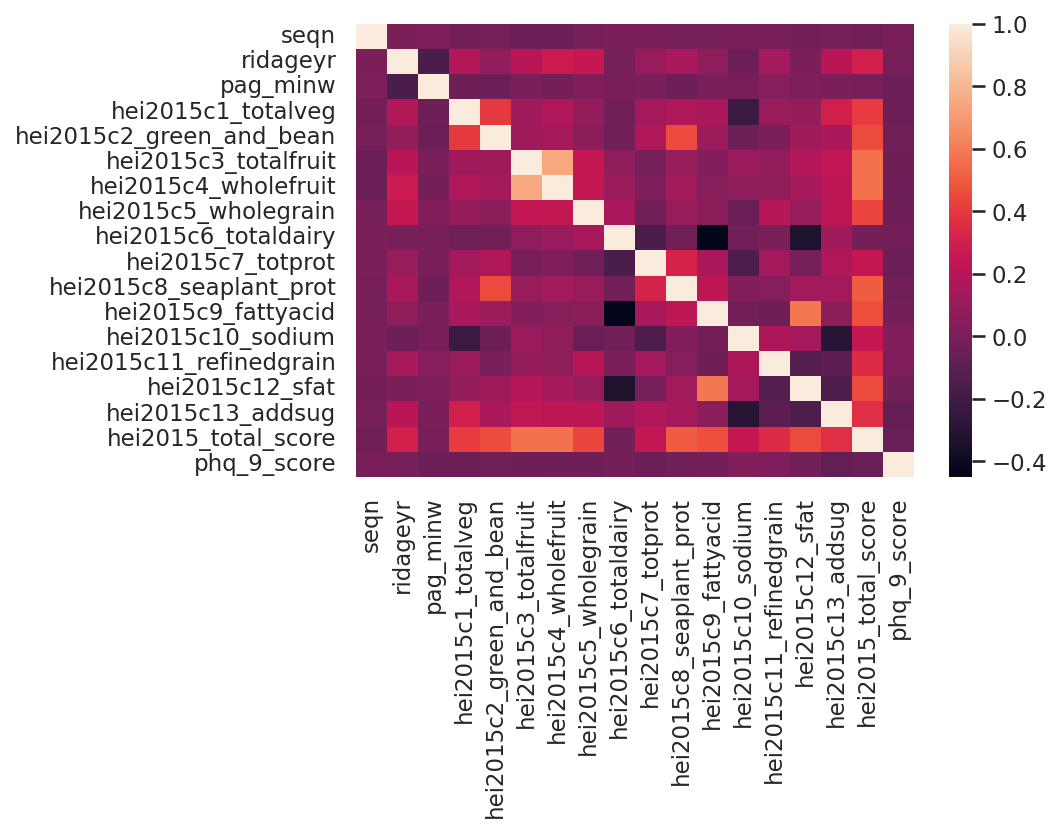

In [83]:
corr = infer_phq_hei_curated_df.corr()
_ = sns.heatmap(corr)
plt.show()

In [129]:
# looking at the values
corr["phq_9_score"].sort_values()

hei2015c13_addsug          -0.075964
hei2015_total_score        -0.060306
hei2015c7_totprot          -0.052608
pag_minw                   -0.051424
hei2015c1_totalveg         -0.048165
hei2015c3_totalfruit       -0.042027
hei2015c4_wholefruit       -0.039940
hei2015c5_wholegrain       -0.039214
hei2015c8_seaplant_prot    -0.035464
hei2015c2_green_and_bean   -0.032234
hei2015c12_sfat            -0.019845
hei2015c6_totaldairy       -0.018959
hei2015c9_fattyacid        -0.017303
ridageyr                   -0.010586
seqn                       -0.006262
hei2015c11_refinedgrain     0.020032
hei2015c10_sodium           0.030108
phq_9_score                 1.000000
Name: phq_9_score, dtype: float64

As I'm primarily interest in infer hypothesis related to the phq_9_score, I end up looking at just the last column. By doing this I saw that most of the correlation are between 0.03 and -0.076, very low correlation.

The hypothesis that I'm thinking is that there is no difference between the groups on ours features and depression variables. But, I'll perform some tests in the next step.

In [130]:
# saving our cleaned dataset
infer_phq_hei_curated_df.to_csv("../data/curated/demo_phq_pag_hei_cureted_v3.csv", index=False)